In [197]:
import pandas as pd 
import numpy as np
import re 

# __A/ DATA PREPROCESSING__

## __I/ Import and read data__

In [198]:
df = pd.read_csv(r'Udemy Data RAW.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29181 entries, 0 to 29180
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Course Name           28484 non-null  object 
 1   URL                   28484 non-null  object 
 2   Duration              28477 non-null  object 
 3   Total Lectures        28484 non-null  object 
 4   Level                 28484 non-null  object 
 5   Price                 28484 non-null  object 
 6   Total Enrollments     28484 non-null  object 
 7   Avg Rating Score      28484 non-null  float64
 8   Total Ratings         28484 non-null  object 
 9   Last Updated          28484 non-null  object 
 10  Language              28484 non-null  object 
 11  Subtitles             22527 non-null  object 
 12  Total Sections        28448 non-null  object 
 13  Instructor Name       28484 non-null  object 
 14  Avg Ins Rating        28484 non-null  object 
 15  Total Ins Reviews  

In [199]:
df.head(20)

,Course Name,URL,Duration,Total Lectures,Level,Price,Total Enrollments,Avg Rating Score,Total Ratings,Last Updated,Language,Subtitles,Total Sections,Instructor Name,Avg Ins Rating,Total Ins Reviews,Total Ins's Students,Total Ins's Courses,Mini_Subject
0,The Complete Full-Stack Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,61.5 total hours,374 lectures,All Levels,"₫1,599,000","1,426,064 students",4.7,"(428,126 ratings)",Last updated 2/2025,English,"English, Arabic [Auto]",44 sections,"Dr. Angela Yu, Developer and Lead Instructor",4.7 Instructor Rating,"939,239 Reviews","3,085,299 Students",7 Courses,Web Development
1,The Web Developer Bootcamp 2025,https://www.udemy.com/course/the-web-developer...,74 total hours,729 lectures,All Levels,"₫1,539,000","933,673 students",4.7,"(279,281 ratings)",Last updated 3/2025,English,"English [Auto], Arabic [Auto]",75 sections,Colt Steele,4.7 Instructor Rating,"559,192 Reviews","1,852,381 Students",30 Courses,Web Development
2,The Complete JavaScript Course 2025: From Zero...,https://www.udemy.com/course/the-complete-java...,71 total hours,330 lectures,All Levels,"₫1,539,000","974,726 students",4.7,"(220,516 ratings)",Last updated 12/2024,English,"English, Arabic [Auto]",21 sections,Jonas Schmedtmann,4.7 Instructor Rating,"469,876 Reviews","2,113,663 Students",7 Courses,Web Development
3,Angular - The Complete Guide (2025 Edition),https://www.udemy.com/course/the-complete-guid...,56 total hours,757 lectures,All Levels,"₫1,599,000","810,833 students",4.7,"(212,691 ratings)",Last updated 3/2025,English,"English [CC], Arabic [Auto]",46 sections,Maximilian Schwarzmüller,4.7 Instructor Rating,"1,193,752 Reviews","3,267,423 Students",63 Courses,Web Development
4,Build Responsive Real-World Websites with HTML...,https://www.udemy.com/course/design-and-develo...,37.5 total hours,149 lectures,All Levels,"₫1,599,000","443,218 students",4.7,"(112,326 ratings)",Last updated 11/2024,English,"English [CC], Arabic [Auto]",10 sections,Jonas Schmedtmann,4.7 Instructor Rating,"469,876 Reviews","2,113,663 Students",7 Courses,Web Development
5,Modern React with Redux [2024 Update],https://www.udemy.com/course/react-redux/,75.5 total hours,697 lectures,All Levels,"₫1,469,000","325,436 students",4.7,"(88,068 ratings)",Last updated 3/2025,English,"English [Auto], Arabic [Auto]",27 sections,Stephen Grider,4.6 Instructor Rating,"480,423 Reviews","1,497,645 Students",37 Courses,Web Development
6,The Complete Web Developer Course 3.0,https://www.udemy.com/course/the-complete-web-...,31 total hours,222 lectures,All Levels,"₫1,409,000","316,225 students",4.3,"(72,430 ratings)",Last updated 6/2024,English,"English [Auto], Arabic [Auto]",16 sections,Rob Percival,4.4 Instructor Rating,"494,115 Reviews","2,376,277 Students",36 Courses,Web Development
7,Vue - The Complete Guide (incl. Router & Compo...,https://www.udemy.com/course/vuejs-2-the-compl...,32 total hours,333 lectures,All Levels,"₫1,649,000","250,464 students",4.7,"(64,882 ratings)",Last updated 1/2025,English,"English [CC], Arabic [Auto]",29 sections,Maximilian Schwarzmüller,4.7 Instructor Rating,"1,193,752 Reviews","3,267,423 Students",63 Courses,Web Development
8,Master Microservices with Spring Boot and Spri...,https://www.udemy.com/course/microservices-wit...,25.5 total hours,326 lectures,All Levels,"₫1,539,000","277,005 students",4.6,"(55,310 ratings)",Last updated 12/2024,English,"English [CC], Arabic [Auto]",17 sections,in28Minutes Official,4.6 Instructor Rating,"469,568 Reviews","1,801,600 Students",55 Courses,Web Development
9,Understanding TypeScript,https://www.udemy.com/course/understanding-typ...,22.5 total hours,339 lectures,All Levels,"₫1,599,000","263,402 students",4.6,"(54,548 ratings)",Last updated 3/2025,English,"English [CC], Arabic [Auto]",25 sections,Maximilian Schwarzmüller,4.7 Instructor Rating,"1,193,752 Reviews","3,267,423 Students",63 Courses,Web Development


## __II/ Data Preprocessing__

### __1/ Checking MISSING VALUES__

In [200]:
df.isnull().sum()

Course Name              697
URL                      697
Duration                 704
Total Lectures           697
Level                    697
Price                    697
Total Enrollments        697
Avg Rating Score         697
Total Ratings            697
Last Updated             697
Language                 697
Subtitles               6654
Total Sections           733
Instructor Name          697
Avg Ins Rating           697
Total Ins Reviews        697
Total Ins's Students     697
Total Ins's Courses      697
Mini_Subject             697
dtype: int64

#### __2/ Remove DUPLICATE__

In [201]:
df = df.drop_duplicates()

### __3/ Drop null record__ 

In [202]:
df = df.dropna(subset=['Duration', 'Total Sections', 'Total Lectures', 'Avg Rating Score', 'Avg Ins Rating']).reset_index(drop=True)

### __4/ Convert value in DURATION column into HOUR unit__

In [203]:
def convert_to_hour(duration): 
    try:
        value = float(duration.split()[0])
        unit = duration.split()[-1]
        if 'min' in unit: 
            total_hours = value / 60
        else: 
            total_hours = value 
        return round(float(total_hours), 1) 
    except:  
        return np.nan

df['Duration'] =  df['Duration'].apply(convert_to_hour)

### __5/ Clean Price columns__

In [204]:
def convert_Price(price): 
    if pd.isnull(price): 
        return ''
    try:
        numeric_price = int(re.sub(r'\D', '', price))
        if numeric_price < 100000: 
            return numeric_price * 10 
        else: 
            return numeric_price
    except:
        return np.nan
    
df['Price'] = df['Price'].apply(convert_Price)
df['Price']

0        1599000
1        1539000
2        1539000
3        1599000
4        1599000
          ...   
26168     399000
26169    1049000
26170    1049000
26171    1049000
26172    1049000
Name: Price, Length: 26173, dtype: int64

### __6/ Convert cols into INT__

In [205]:
def convert_to_int(x): 
    if pd.isnull(x): 
        return 0 
    try: 
        x = (re.sub(r'\D', '', x))
        if x == '':
            return 0
        return int(x) 
    except:
        return 0 

int_col =  ['Total Lectures', 
    'Total Enrollments', 
    'Total Ratings', 
    'Total Sections', 
    'Total Ins Reviews', 
    "Total Ins\'s Students", 
    "Total Ins\'s Courses"
]
for col in int_col: 
    df[col] = df[col].apply(convert_to_int)

### __7/ Delete RECORDS has total ratings > total enrollments__

In [206]:
df = df[df['Total Ratings'] <= df['Total Enrollments']]

### __8/ Clean LEVEL cols__

In [207]:
df['Level'] = df['Level'].str.strip()

### __9/ Convert rating cols into FLOAT__

In [208]:
def convert_rating(x):
    if pd.isnull(x):
        return np.nan
    try:
        value = x.split()[0]
        if value != '--':
            return round(float(value), 1)
        return np.nan
    except:
        return np.nan
    
df['Avg Ins Rating'] = df['Avg Ins Rating'].apply(convert_rating)
df['Avg Rating Score']= df['Avg Rating Score'].apply(lambda x: round(float(x), 1))


### __10/ Convert DATETIME col__

In [209]:
def convert_last_updated(x):
    if pd.isnull(x):
        return ''
    try:
        date_str = x.replace('Last updated ', '')
        date = pd.to_datetime(date_str, format='%m/%Y')
        return date.strftime('%m/%Y')
    except:
        return ''
    
df['Last Updated'] = df['Last Updated'].apply(convert_last_updated)

### __11/ Special character processing__


In [210]:
def clean_subtitles(sub): 
    if pd.isnull(sub): 
        return '' 
    try: 
        sub = re.sub(r'\[CC\]|\[Auto\]', '', sub).strip()
        return sub 
    except: 
        return ''

df['Subtitles'] = df['Subtitles'].apply(clean_subtitles)

### __12/ Make data scraped at the SAME time__

In [211]:
# For each URL, get the 'HIGHEST TOTAL ENROLLMENTS' record (SAME URL but DIFF Total Enrollments)
max_enrollment_idx = df.groupby("URL")["Total Enrollments"].idxmax()
max_enrollment_df = df.loc[max_enrollment_idx].reset_index(drop=True)

# Group mini_subject by URL 
categories = df.groupby("URL")["Mini_Subject"].apply(lambda x:  ', '.join(x.unique())).reset_index()

# Merge data
df = max_enrollment_df.merge(categories, on="URL", how="left")
df = df.drop(columns = ['Mini_Subject_x']).rename(columns = {'Mini_Subject_y': 'Mini_Subject'})

df

,Course Name,URL,Duration,Total Lectures,Level,Price,Total Enrollments,Avg Rating Score,Total Ratings,Last Updated,Language,Subtitles,Total Sections,Instructor Name,Avg Ins Rating,Total Ins Reviews,Total Ins's Students,Total Ins's Courses,Mini_Subject
0,如何从0-1搭建内容推荐系统,https://www.udemy.com/course/0-1-vvuy/,1.0,9,Beginner,399000,21,5.0,3,09/2021,Simplified Chinese,Simplified Chinese,3,三节课 sanjieke,4.5,19140,29820,1541,Database Design & Development
1,0 dan İleri Seviye Swift 5 ile İOS Mobil Uygul...,https://www.udemy.com/course/0-dan-ileri-seviy...,18.0,95,All Levels,399000,6331,3.1,61,04/2019,Turkish,,11,Hüseyin Can KINCAL,4.1,61,6331,1,Mobile Development
2,0-dan Python proqramlaşdırma ümumi izahda,https://www.udemy.com/course/0-dan-python-proq...,10.0,101,Beginner,399000,8,4.2,3,02/2022,Azeri,,17,Rəsul Eminli,4.2,3,8,1,Programming Languages
3,非同步程式設計從0到1,https://www.udemy.com/course/01-async/,5.0,35,All Levels,2499000,56,4.7,13,11/2020,Traditional Chinese,Traditional Chinese,4,Rico Chen,4.7,91,205,14,Programming Languages
4,01 Day C Code | Learn C Programming with Examp...,https://www.udemy.com/course/01-day-c-code-lea...,3.0,29,All Levels,399000,17956,4.0,167,01/2025,English,English,9,Faisal Zamir,4.3,7032,314342,40,Programming Languages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24492,دورة تصميم برنامج المبيعات و المخازن بلغة السي...,https://www.udemy.com/course/zwjteeml/,44.0,55,Beginner,399000,19,5.0,1,09/2024,Arabic,,1,Mohammed Nageh,4.9,6,71,7,Programming Languages
24493,金融业务增长秘籍之：核心指标体系的搭建与拆解,https://www.udemy.com/course/zxaylrnf/,0.5,7,Intermediate,399000,30,4.9,3,09/2021,Simplified Chinese,Simplified Chinese,3,三节课 sanjieke,4.5,19060,29704,1541,Data Science
24494,CNC Programming in Hindi (सीएनसी प्रोग्रामिंग ...,https://www.udemy.com/course/zxppxplw/,6.0,11,All Levels,399000,82,4.2,16,07/2022,Hindi,,1,Mech Trainers,4.3,230,946,4,Programming Languages
24495,Zynq Training - Learn Zynq 7000 SOC device on ...,https://www.udemy.com/course/zynq-training-lea...,2.5,21,Beginner,399000,4595,3.7,163,07/2020,English,English,9,Augmented Startups,3.9,3689,57289,26,Software Engineering


In [212]:
# Check again
df.isnull().sum()

Course Name               0
URL                       0
Duration                  0
Total Lectures            0
Level                     0
Price                     0
Total Enrollments         0
Avg Rating Score          0
Total Ratings             0
Last Updated              0
Language                  0
Subtitles                 0
Total Sections            0
Instructor Name           0
Avg Ins Rating          170
Total Ins Reviews         0
Total Ins's Students      0
Total Ins's Courses       0
Mini_Subject              0
dtype: int64

In [213]:
# Drop null value in Avg Ins Rating columns
df = df.dropna(subset=['Avg Ins Rating']).reset_index(drop=True)

# Check again
df.isnull().sum()

Course Name             0
URL                     0
Duration                0
Total Lectures          0
Level                   0
Price                   0
Total Enrollments       0
Avg Rating Score        0
Total Ratings           0
Last Updated            0
Language                0
Subtitles               0
Total Sections          0
Instructor Name         0
Avg Ins Rating          0
Total Ins Reviews       0
Total Ins's Students    0
Total Ins's Courses     0
Mini_Subject            0
dtype: int64

### __13/ Check range of data__ 

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,24327.0,9.783438,12.945259,0.5,3.0,5.5,11.5,439.5
Total Lectures,24327.0,73.586468,84.209086,3.0,26.0,47.0,87.0,800.0
Price,24327.0,546029.637851,333743.005500,299000.0,399000.0,399000.0,399000.0,2499000.0
Total Enrollments,24327.0,6952.888313,35589.997040,0.0,155.0,814.0,3708.0,2026921.0
Avg Rating Score,24327.0,4.272668,1.695321,0.0,4.1,4.4,4.6,31.1
Total Ratings,24327.0,667.648292,6763.259984,0.0,16.0,63.0,232.0,531611.0
Total Sections,24327.0,10.366794,10.001759,1.0,5.0,8.0,13.0,287.0
Avg Ins Rating,24327.0,4.351301,0.360204,0.0,4.2,4.4,4.5,5.0
Total Ins Reviews,24327.0,23500.940108,94902.712184,0.0,215.0,1686.0,10791.5,1252252.0
Total Ins's Students,24327.0,161161.013360,405813.579931,0.0,2798.0,20536.0,105052.0,4193832.0


In [215]:
# Max Avg Rating Score is 31.1 => Wrong => Update 
df = df[df['Avg Rating Score'] <= 5.0]

In [216]:
# Final check before DATA MODELING and EXPORTING
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24247 entries, 0 to 24326
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Course Name           24247 non-null  object 
 1   URL                   24247 non-null  object 
 2   Duration              24247 non-null  float64
 3   Total Lectures        24247 non-null  int64  
 4   Level                 24247 non-null  object 
 5   Price                 24247 non-null  int64  
 6   Total Enrollments     24247 non-null  int64  
 7   Avg Rating Score      24247 non-null  float64
 8   Total Ratings         24247 non-null  int64  
 9   Last Updated          24247 non-null  object 
 10  Language              24247 non-null  object 
 11  Subtitles             24247 non-null  object 
 12  Total Sections        24247 non-null  int64  
 13  Instructor Name       24247 non-null  object 
 14  Avg Ins Rating        24247 non-null  float64
 15  Total Ins Reviews     24

## __III/ Data Modeling__


### __1/ Create LANGUAGE table__

In [217]:
# Create new DISTINCT VALUE DATAFRAME for SUBTITLES and LANGUAGE  
sub_list = (
        df['Subtitles']
        .str.split(',')
        .explode()
        .str.strip()
        .drop_duplicates()
        .replace('', pd.NA)
        .dropna()
        .reset_index(drop=True)
)
lang_list = df['Language'].drop_duplicates().reset_index(drop=True)

# Merge 2 DF and drop DUPLICATE 
full_lang = pd.concat([sub_list, lang_list]).drop_duplicates().sort_values().reset_index(drop=True)
Language = pd.DataFrame(full_lang, columns = ['Language'])
Language['Language_ID'] = Language.index + 1

Language

,Language,Language_ID
0,Afrikaans,1
1,Albanian,2
2,Arabic,3
3,Azeri,4
4,Bengali,5
5,Bulgarian,6
6,Burmese,7
7,Catalan,8
8,Croatian,9
9,Czech,10


### __2/ Create Mini_Subject table__

In [218]:
cate_list = (df['Mini_Subject']
             .str.split(',')
             .explode()
             .str.strip()
             .drop_duplicates()
             .reset_index(drop=True)
             )

Mini_Subject = pd.DataFrame(cate_list) 
Mini_Subject['Mini_Subject_ID'] = Mini_Subject.index + 1  

Mini_Subject = Mini_Subject.rename(columns={'Mini_Subject' : 'Mini_Subject_Name'})
Mini_Subject

,Mini_Subject_Name,Mini_Subject_ID
0,Database Design & Development,1
1,Mobile Development,2
2,Programming Languages,3
3,Software Engineering,4
4,Web Development,5
5,Software Testing,6
6,Data Science,7
7,Software Development Tools,8
8,No-Code Development,9
9,Game Development,10


### __3/ Create INSTRUCTOR table__

In [219]:
Ins = df[['Instructor Name', "Total Ins's Courses", "Total Ins's Students", 'Total Ins Reviews', "Avg Ins Rating"]].drop_duplicates().reset_index(drop=True)

# Keep records has max Total Ins's Students for each Instructor Name
max_students_idx = Ins.groupby("Instructor Name")["Total Ins's Students"].idxmax()

Instructor = Ins.loc[max_students_idx].reset_index(drop=True)

Instructor['Instructor_ID'] = Instructor.index + 1 
Instructor 


,Instructor Name,Total Ins's Courses,Total Ins's Students,Total Ins Reviews,Avg Ins Rating,Instructor_ID
0,#NAME?,2,33062,642,4.3,1
1,(사) 한국디지털컨버전스협회,10,672,152,4.5,2
2,- Skillcoach -,7,10331,4657,4.5,3
3,.NET University,9,8106,858,4.6,4
4,0aaa Club,1,235,92,4.5,5
...,...,...,...,...,...,...
8776,형선 최,1,420,133,4.7,8777
8777,홍드로이드 이홍철,5,2579,374,4.5,8778
8778,황선수닷컴 hwangsunsoo,6,399,143,4.3,8779
8779,황영덕 (Sean) Youngdeok Hwang,1,1223,211,4.7,8780


### __4/ Create COURSE table__


In [220]:
Course = (df[['Course Name', 'Language', 'Level', 'Duration',
             'Total Sections', 'Total Lectures', 'Total Enrollments',
             'Avg Rating Score', 'Total Ratings', 'Last Updated',
            'Price', 'URL', 'Instructor Name']]
            .drop_duplicates()
            .reset_index(drop = True))

Course['Course_ID'] = Course.index + 1

Course

,Course Name,Language,Level,Duration,Total Sections,Total Lectures,Total Enrollments,Avg Rating Score,Total Ratings,Last Updated,Price,URL,Instructor Name,Course_ID
0,如何从0-1搭建内容推荐系统,Simplified Chinese,Beginner,1.0,3,9,21,5.0,3,09/2021,399000,https://www.udemy.com/course/0-1-vvuy/,三节课 sanjieke,1
1,0 dan İleri Seviye Swift 5 ile İOS Mobil Uygul...,Turkish,All Levels,18.0,11,95,6331,3.1,61,04/2019,399000,https://www.udemy.com/course/0-dan-ileri-seviy...,Hüseyin Can KINCAL,2
2,0-dan Python proqramlaşdırma ümumi izahda,Azeri,Beginner,10.0,17,101,8,4.2,3,02/2022,399000,https://www.udemy.com/course/0-dan-python-proq...,Rəsul Eminli,3
3,非同步程式設計從0到1,Traditional Chinese,All Levels,5.0,4,35,56,4.7,13,11/2020,2499000,https://www.udemy.com/course/01-async/,Rico Chen,4
4,01 Day C Code | Learn C Programming with Examp...,English,All Levels,3.0,9,29,17956,4.0,167,01/2025,399000,https://www.udemy.com/course/01-day-c-code-lea...,Faisal Zamir,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24242,دورة تصميم برنامج المبيعات و المخازن بلغة السي...,Arabic,Beginner,44.0,1,55,19,5.0,1,09/2024,399000,https://www.udemy.com/course/zwjteeml/,Mohammed Nageh,24243
24243,金融业务增长秘籍之：核心指标体系的搭建与拆解,Simplified Chinese,Intermediate,0.5,3,7,30,4.9,3,09/2021,399000,https://www.udemy.com/course/zxaylrnf/,三节课 sanjieke,24244
24244,CNC Programming in Hindi (सीएनसी प्रोग्रामिंग ...,Hindi,All Levels,6.0,1,11,82,4.2,16,07/2022,399000,https://www.udemy.com/course/zxppxplw/,Mech Trainers,24245
24245,Zynq Training - Learn Zynq 7000 SOC device on ...,English,Beginner,2.5,9,21,4595,3.7,163,07/2020,399000,https://www.udemy.com/course/zynq-training-lea...,Augmented Startups,24246


### __5/ Create COURSE-Mini_Subject table__


In [221]:
Course_Mini_Subject = (df[['Course Name', 'Mini_Subject']]
                   .drop_duplicates()
                   .reset_index(drop=True))

# Split Mini_Subject by delimeter AGAIN
Course_Mini_Subject['Mini_Subject'] = Course_Mini_Subject['Mini_Subject'].str.split(',')

Course_Mini_Subject = Course_Mini_Subject.explode('Mini_Subject').reset_index(drop = True)

Course_Mini_Subject['Mini_Subject'] = Course_Mini_Subject['Mini_Subject'].str.strip()

# Merge COURSE 
Course_Mini_Subject = Course_Mini_Subject.merge(Course[['Course Name', 'Course_ID']], on = 'Course Name', how = 'left')

# Merge Mini_Subject  
Course_Mini_Subject =  Course_Mini_Subject.merge(Mini_Subject[['Mini_Subject_Name','Mini_Subject_ID']],left_on = 'Mini_Subject', right_on = 'Mini_Subject_Name', how = 'left')

# Final table 
Course_Mini_Subject = Course_Mini_Subject[['Course_ID', 'Mini_Subject_ID']]

Course_Mini_Subject

,Course_ID,Mini_Subject_ID
0,1,1
1,2,2
2,3,3
3,4,3
4,5,3
...,...,...
24254,24243,3
24255,24244,7
24256,24245,3
24257,24246,4


### __6/ Create COURSE-SUBTITLES table__

In [222]:
Course_Subtitles = (df[['Course Name', 'Subtitles']]
                    .drop_duplicates()
                    .reset_index(drop = True)
                    )

# Split SUBTITLES by ,
Course_Subtitles['Subtitles'] = Course_Subtitles['Subtitles'].str.split(',')

Course_Subtitles = Course_Subtitles.explode('Subtitles').reset_index(drop=True)

Course_Subtitles['Subtitles'] = Course_Subtitles['Subtitles'].str.strip()

# Remove COURSE RECORD which has no subtitles 
Course_Subtitles = Course_Subtitles[Course_Subtitles['Subtitles'] != '']

# Get course_id from COURSE table 
Course_Subtitles = Course_Subtitles.merge(Course, on = 'Course Name', how = 'left')

# Get language_id (for subtitles) from LANGUAGE table 
Course_Subtitles = Course_Subtitles.merge(Language, left_on = 'Subtitles', right_on = 'Language', how = 'left')

Course_Subtitles = Course_Subtitles[['Course_ID', 'Language_ID']]

## __IV/ Export to CSV file__

In [223]:
# Language.to_csv("Language.csv", index=False, encoding="utf-8-sig")
# Mini_Subject.to_csv("Mini_Subject.csv", index=False, encoding="utf-8-sig")
# Instructor.to_csv("Instructor.csv", index=False, encoding="utf-8-sig")
# Course.to_csv("Course.csv", index=False, encoding="utf-8-sig")
# Course_Mini_Subject.to_csv("Course_Mini_Subject.csv", index=False, encoding="utf-8-sig")
# Course_Subtitles.to_csv("Course_Subtitles.csv", index=False, encoding="utf-8-sig")


# __B/ EXPLORATORY DATA ANALYSIS (EDA)__

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## __I/ Import Data__

In [225]:
Language_df = pd.read_csv('Language.csv')
Mini_Subject_df = pd.read_csv('Mini_Subject.csv')
Course_df = pd.read_csv('Course.csv')   
Instructor_df = pd.read_csv('Instructor.csv')
CMS_df = pd.read_csv('Course_Mini_Subject.csv')
CS_df = pd.read_csv('Course_Subtitles.csv')

## __II/ EDA__

In [226]:
def plot_distribution(data, col, n_cols=2):
    n_vars = len(col)
    n_rows = int(np.ceil(n_vars / n_cols))
    fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(24, 10 * n_rows))  # Tăng chiều rộng + chiều cao
    axes = np.array(axes).reshape(n_rows * 2, n_cols)

    for idx, column in enumerate(col):
        row = (idx // n_cols) * 2
        col_pos = idx % n_cols

        # Histogram
        ax_hist = axes[row, col_pos]
        sns.histplot(data=data, x=column, kde=True, ax=ax_hist)

        mean_val = data[column].mean()
        median_val = data[column].median()
        skew_val = data[column].skew()
        kurt_val = data[column].kurtosis()

        ax_hist.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
        ax_hist.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
        ax_hist.set_title(f'Distribution of {column}\nSkew: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')
        ax_hist.legend()
        ax_hist.grid(True, alpha=0.3)

        # Freedman-Diaconis rule for many unique values
        if data[column].nunique() > 50:
            q75, q25 = np.percentile(data[column], [75, 25])
            iqr = q75 - q25
            bin_width = 2 * iqr / (len(data[column]) ** (1 / 3))
            if bin_width > 0:
                bins = int((data[column].max() - data[column].min()) / bin_width)
                ax_hist.clear()
                sns.histplot(data=data, x=column, bins=min(bins, 50), kde=True, ax=ax_hist)
                ax_hist.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
                ax_hist.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
                ax_hist.legend()
                ax_hist.grid(True, alpha=0.3)

        # Boxplot
        ax_box = axes[row + 1, col_pos]
        sns.boxplot(data=data, x=column, ax=ax_box, color='orange', width=0.5)
        ax_box.set_title(f'Boxplot of {column}')
        ax_box.set_xlabel(column)
        ax_box.set_ylabel("Value")
        ax_box.grid(True, alpha=0.3)

    # Hide un-used subplot 
    for idx in range(n_vars, n_rows * n_cols):
        axes[(idx // n_cols) * 2, idx % n_cols].set_visible(False)
        axes[(idx // n_cols) * 2 + 1, idx % n_cols].set_visible(False)

    plt.tight_layout()
    return plt

### __1/ Check stats & feature distribution__

#### __1.1/ Course__

In [227]:
# Statistic describe and Visual
Course_col_to_describe = [col for col in Course_df.columns if col != 'Course_ID' and Course_df[col].dtype != 'object']

Course_df[Course_col_to_describe].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,24247.0,9.801988,12.960351,0.5,3.0,5.5,11.5,439.5
Total Sections,24247.0,10.381326,10.009507,1.0,5.0,8.0,13.0,287.0
Total Lectures,24247.0,73.742154,84.288226,3.0,26.0,47.0,87.0,800.0
Total Enrollments,24247.0,6975.651421,35646.450722,0.0,158.0,824.0,3723.5,2026921.0
Avg Rating Score,24247.0,4.187248,0.815167,0.0,4.1,4.4,4.6,5.0
Total Ratings,24247.0,669.850827,6774.299644,0.0,16.0,63.0,233.0,531611.0
Price,24247.0,545489.875036,333640.365480,299000.0,399000.0,399000.0,399000.0,2499000.0


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

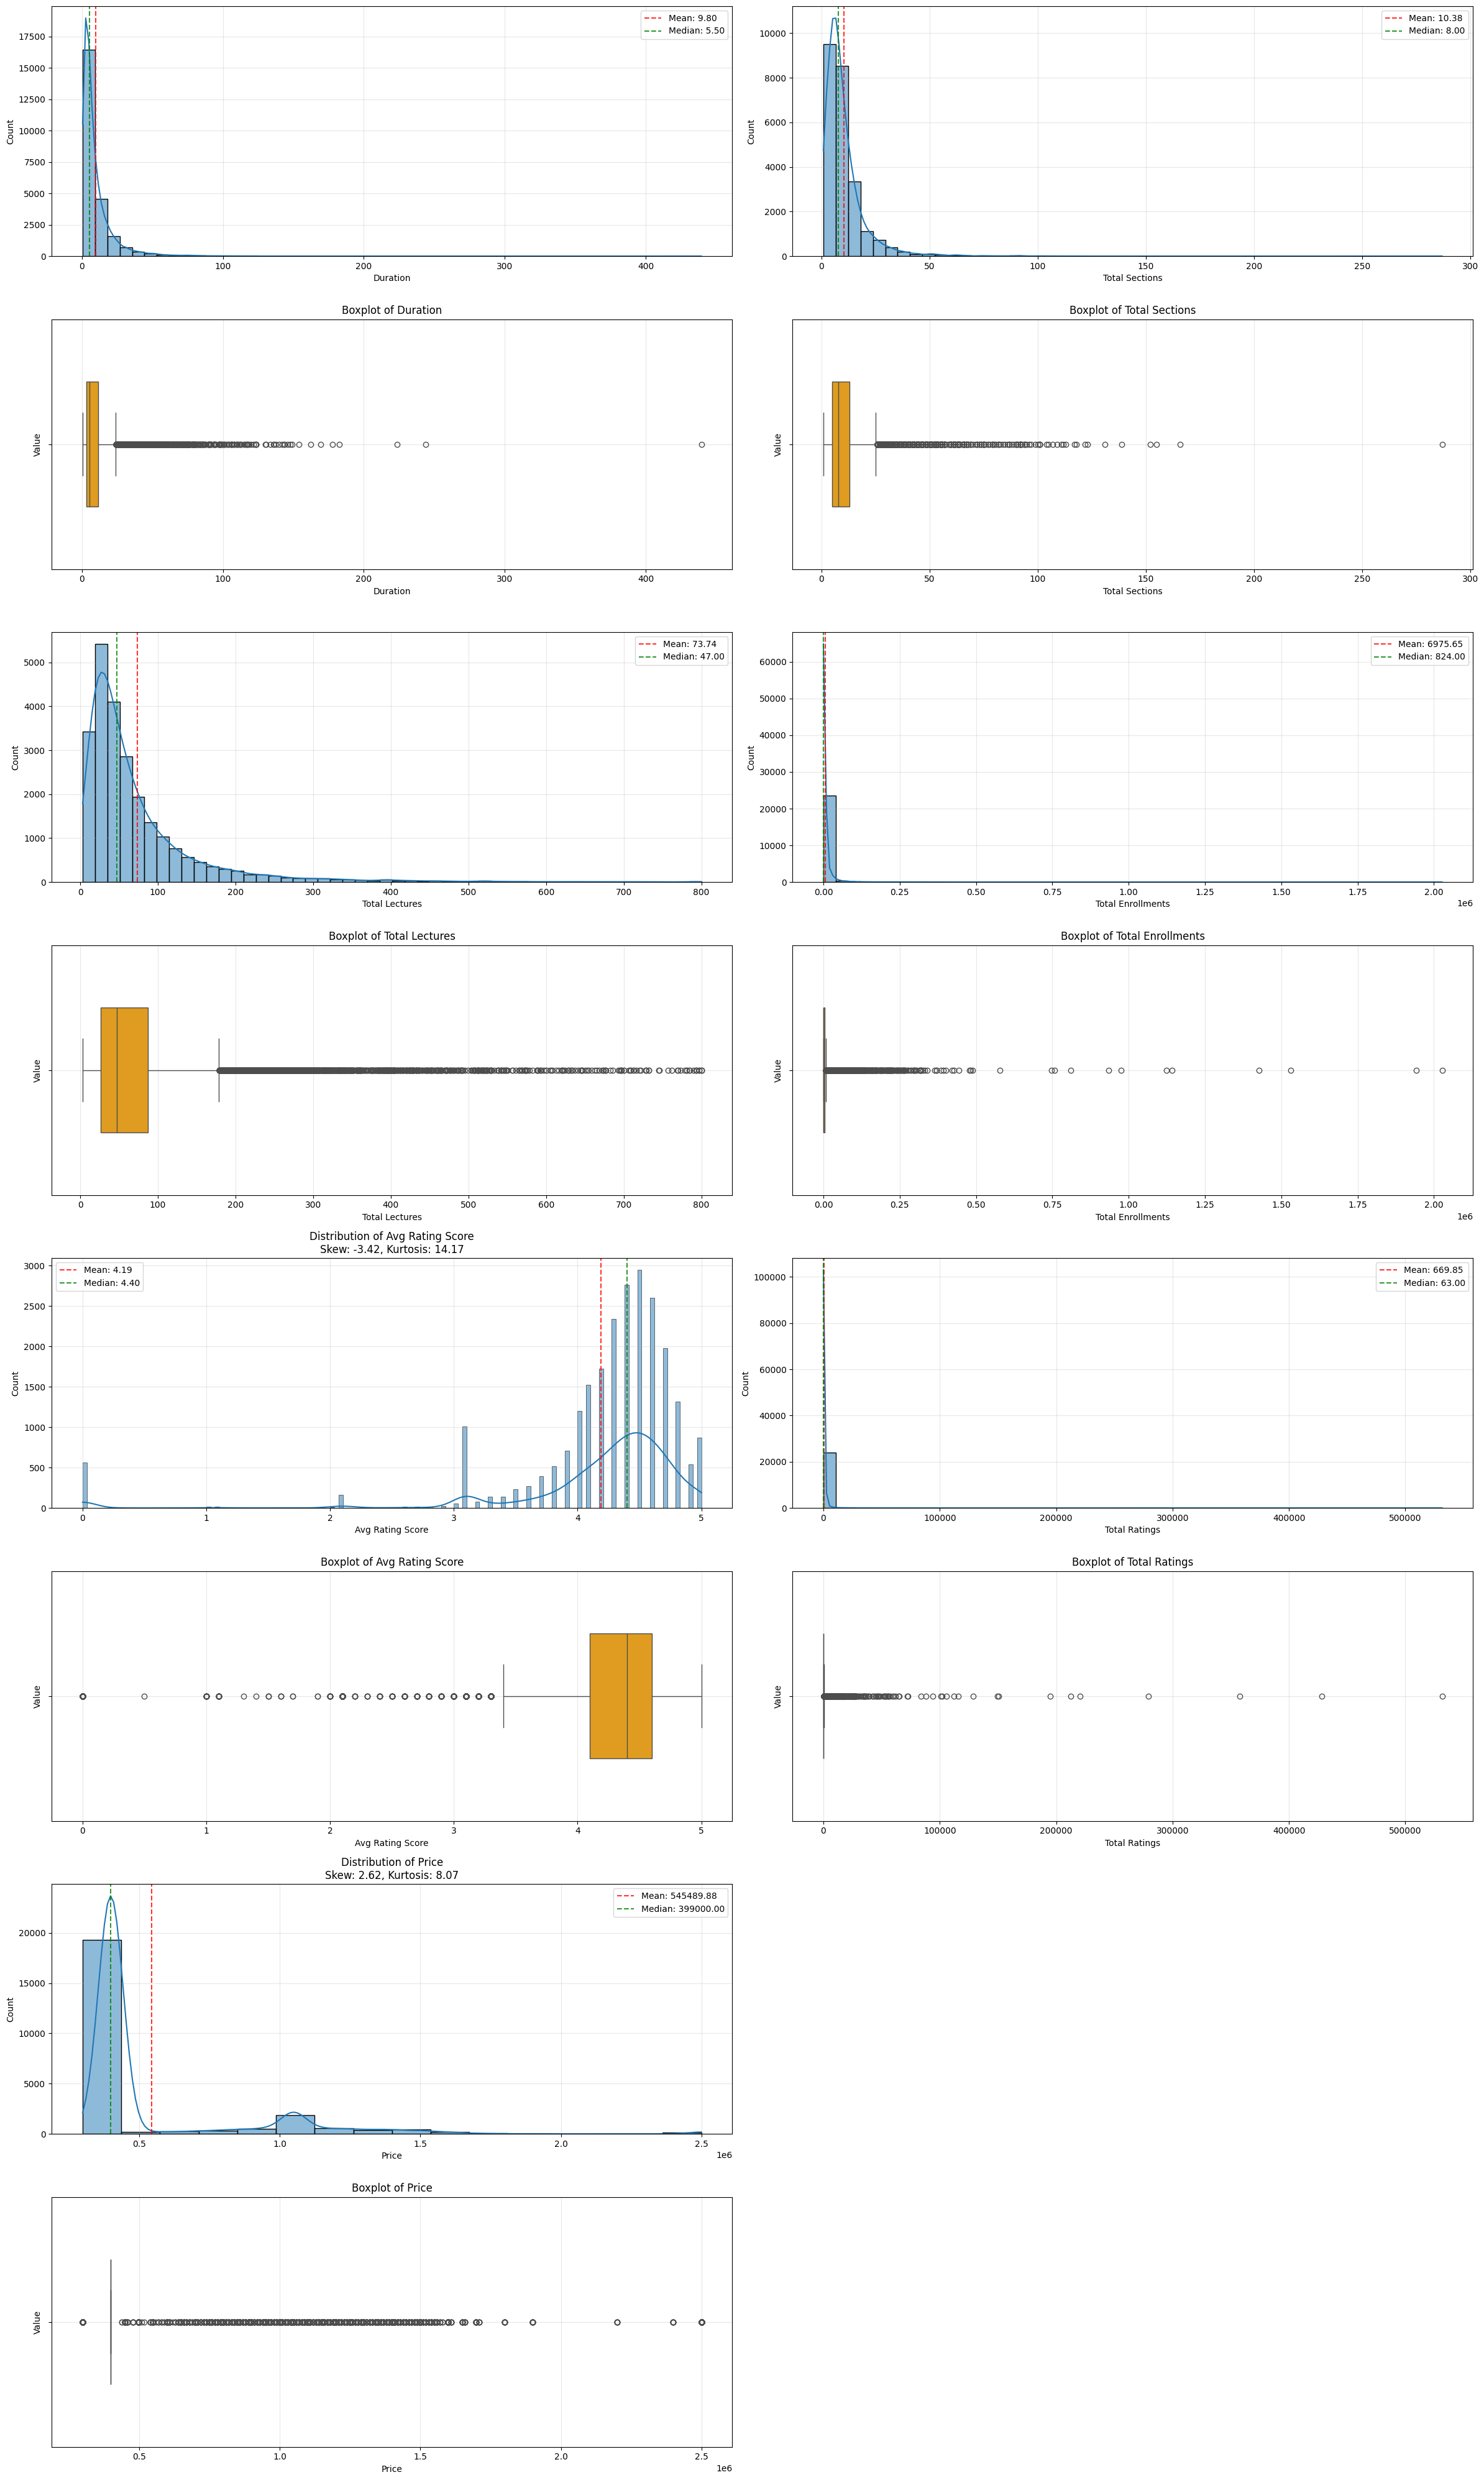

In [228]:
plot_distribution(Course_df, Course_col_to_describe)

##### __Observations:__

__1/ Duration__

- The distribution is clearly right-skewed, with most courses under 15 hours in length.  
- The median duration is approximately 4.4 hours.  
- A few notable outliers exceed 400 hours, though these are relatively rare.

__2/ Total Sections__

- Also right-skewed, with a strong concentration below 15 sections.  
- The median is 6.  
- Outliers are more frequent here, with many courses exceeding 50 sections, and some reaching nearly 300, indicating high dispersion.

__3/ Total Lectures__

- Strong right skew, with most courses having fewer than 100 lectures.  
- Median is around 47.  
- Numerous outliers with extreme values, some exceeding 800 lectures, suggesting this variable has the widest spread.

> Courses with longer durations generally have more lectures and sections, though there are some exceptions.

__4/ Total Enrollments__

- Heavily right-skewed distribution.  
- Mean (6,975.65) is significantly higher than the median (824.00), indicating a concentration of low-enrollment courses alongside a few high-enrollment outliers.

__5/ Average Rating Score__

- Left-skewed distribution.  
- Median (4.4) is slightly higher than the mean (~4.19), indicating most courses are rated well.  
- A few courses have very low ratings (0–2.0), though such cases are rare.

__6/ Total Ratings__

- Strong right skew, similar to total enrollments.  
- Mean (669.85) far exceeds median (63.00).  
- High-value outliers reflect that a small number of courses gather the majority of ratings.

__7/ Price__

- Right-skewed, but with a very strong concentration at a specific price point (399,000 VND), which is also the 1st, 2nd, and 3rd quartile value.  
- Mean price (545,489.88) is higher due to a few more expensive courses.

---

##### __Summary:__

The dataset exhibits strong right-skewed distributions in most numeric variables, with a high presence of outliers. A small number of courses dominate in terms of content volume, enrollments, and ratings, while the majority remain modest. Price stands out with a strong clustering at a single common value.


#### __1.2/ Instructor__

In [229]:
Instructor_df.info()

Ins_col_to_describe = [col for col in Instructor_df.columns if col not in ['Instructor_ID', 'Instructor Name']]
Instructor_df[Ins_col_to_describe].describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructor Name       8781 non-null   object 
 1   Total Ins's Courses   8781 non-null   int64  
 2   Total Ins's Students  8781 non-null   int64  
 3   Total Ins Reviews     8781 non-null   int64  
 4   Avg Ins Rating        8781 non-null   float64
 5   Instructor_ID         8781 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 411.7+ KB


,count,mean,std,min,25%,50%,75%,max
Total Ins's Courses,8781.0,7.902972,29.462971,1.0,1.0,3.0,6.0,1541.0
Total Ins's Students,8781.0,37718.832251,173659.115112,0.0,379.0,2999.0,16671.0,4193832.0
Total Ins Reviews,8781.0,5226.149300,39967.207154,0.0,37.0,203.0,1167.0,1252252.0
Avg Ins Rating,8781.0,4.337296,0.442528,0.0,4.2,4.4,4.6,5.0


<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

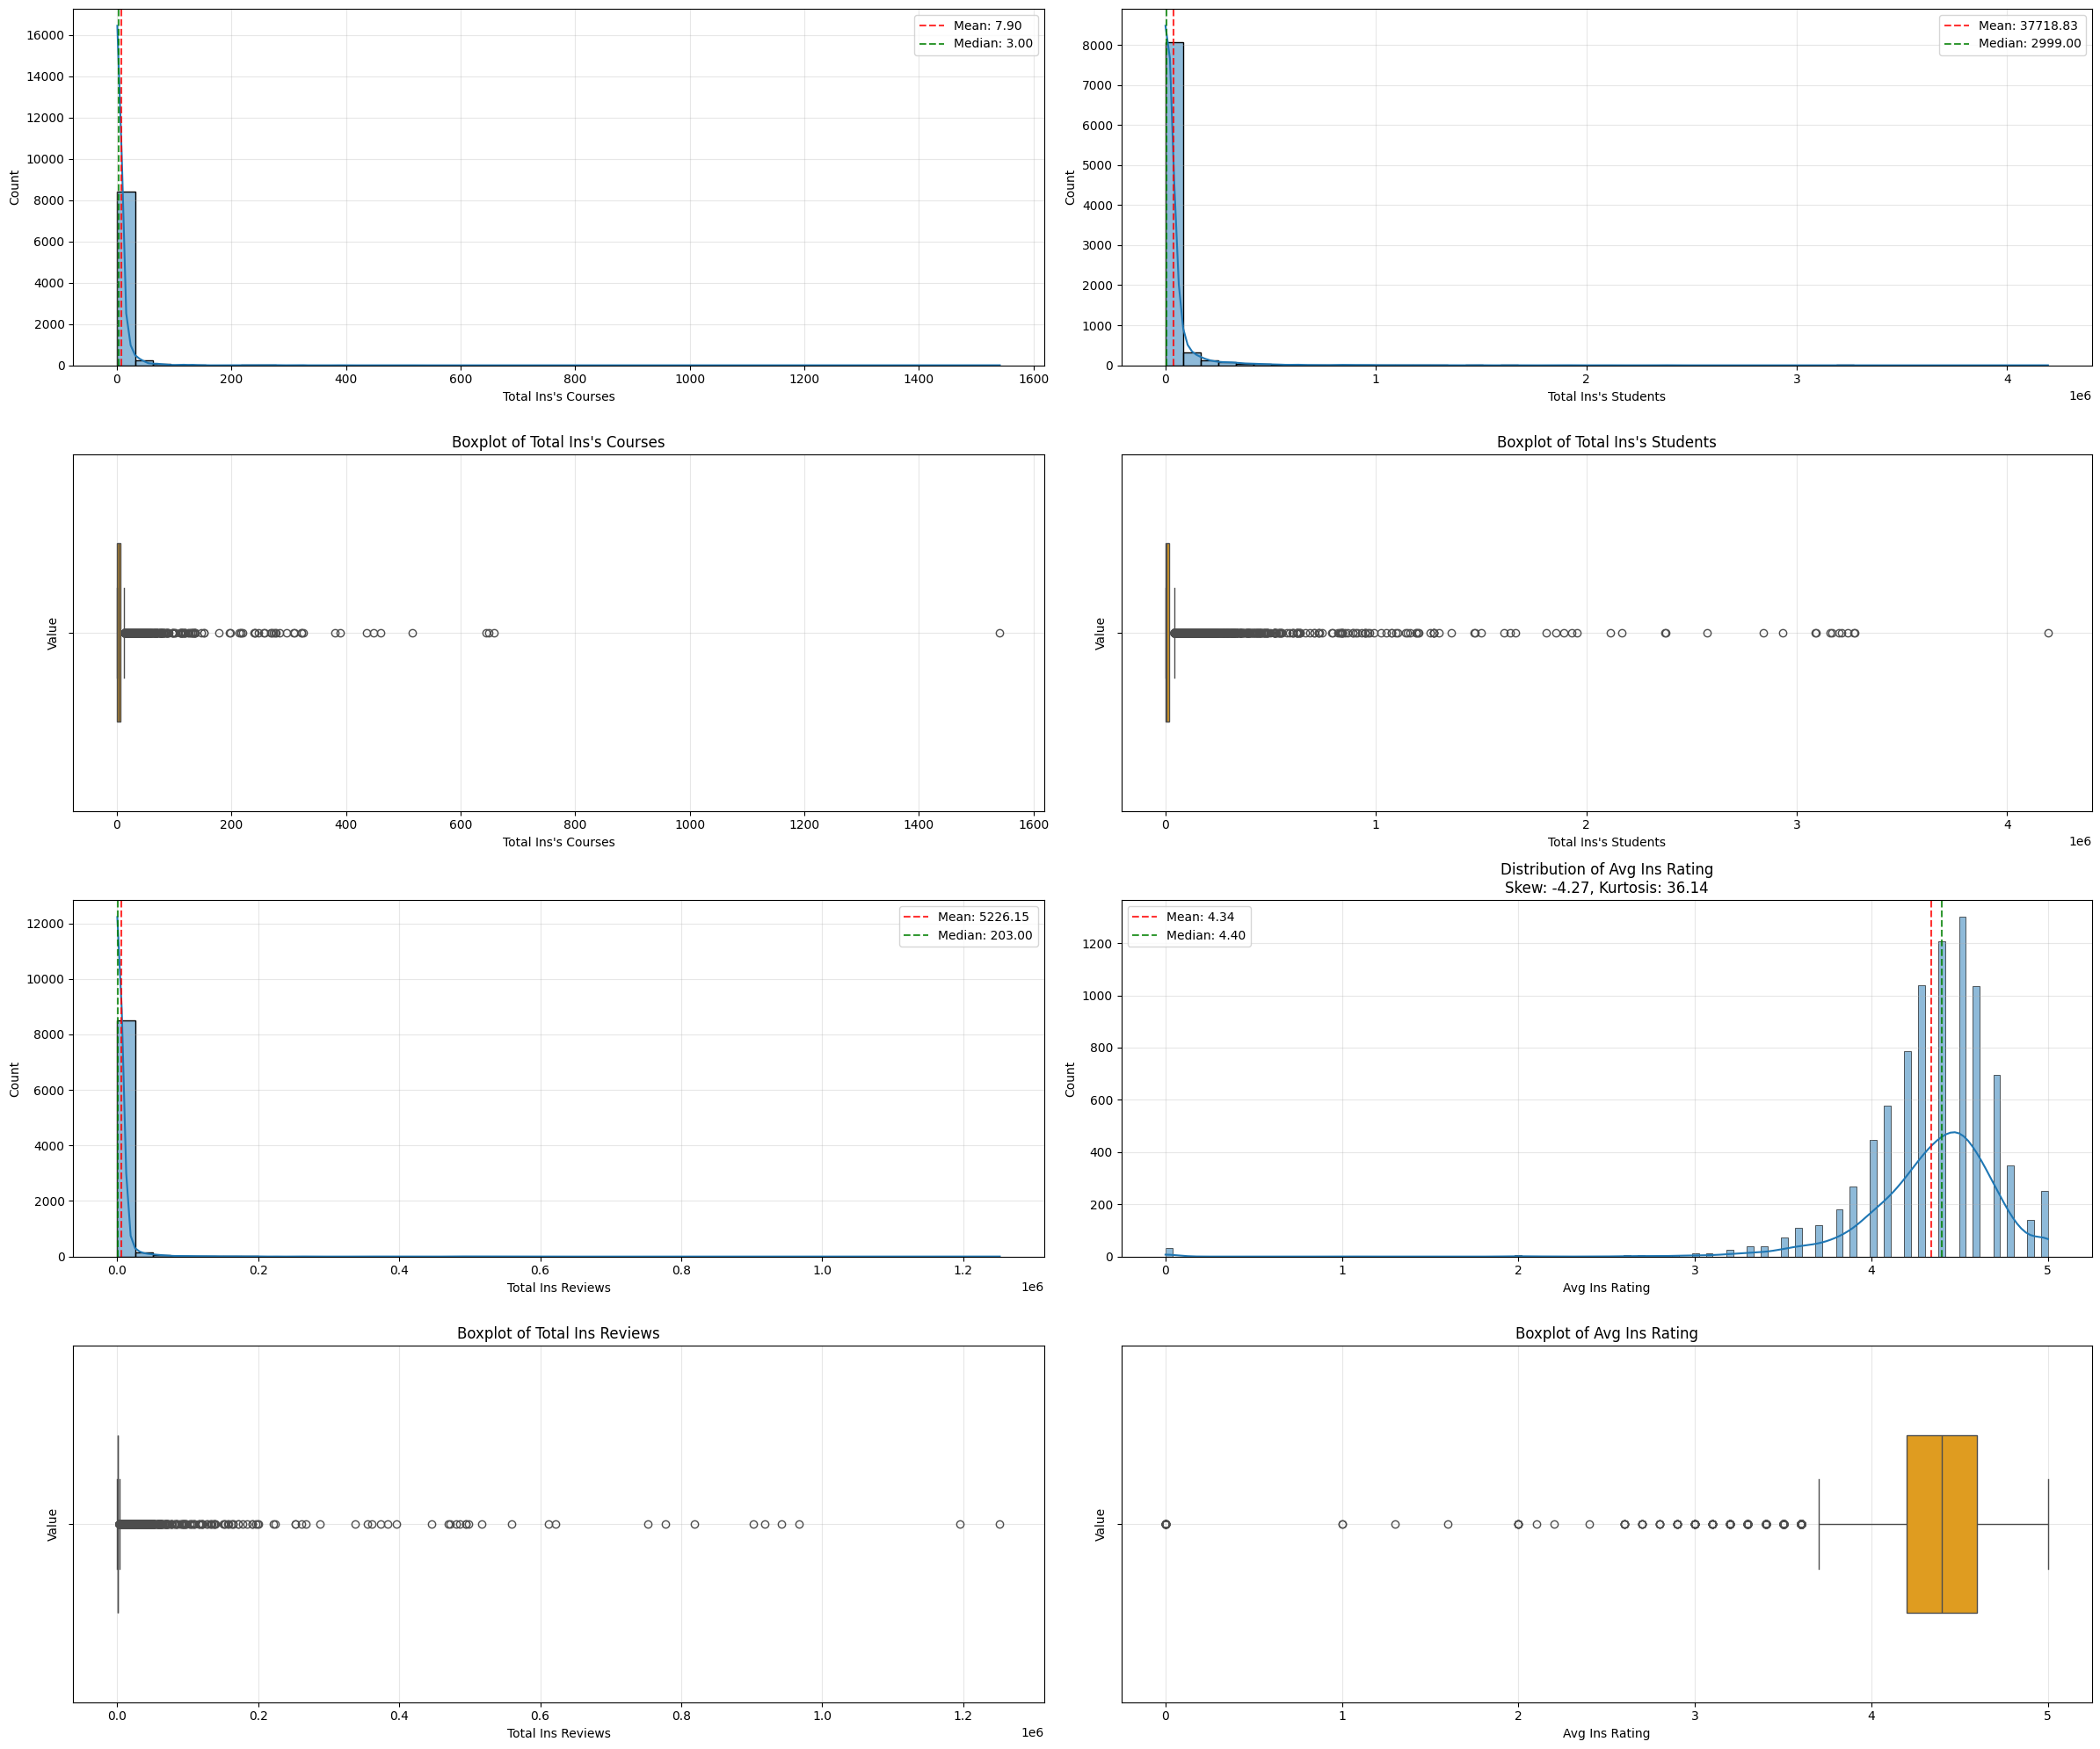

In [230]:
plot_distribution(Instructor_df, Ins_col_to_describe)


##### __Observations:__

**1/ Total Instructor's Courses:**

- Strong right-skewed distribution.  
- Most instructors offer only a few courses (Median: 3.0).  
- A small number of highly productive instructors (or possibly organizations) produce a disproportionately large number of courses, forming high-value outliers.

**2/ Total Instructor's Students:**

- Extremely right-skewed distribution.  
- The mean (37,718) is much higher than the median (2,999), indicating large inequality in audience reach.  
- While most instructors have a moderate student base, a small group of "superstar" instructors gather massive enrollments, resulting in extreme outliers.

**3/ Total Instructor's Reviews:**

- Strong right-skewed distribution, closely mirroring the pattern seen in student counts.  
- The median (203) is far below the mean (5,226), highlighting that a few instructors attract most of the reviews.  
- High-value outliers align with instructors who have large student followings.

**4/ Average Instructor Rating:**

- Left-skewed distribution.  
- Most instructors receive high ratings, with a median of 4.4 and mean of 4.34.  
---

##### __Summary:__

The instructor-related metrics show heavy right skewness, suggesting a highly imbalanced distribution of influence and visibility. A small group of top instructors dominates in course volume, student reach, and reviews, while most maintain modest figures. Overall, instructors are rated quite positively, with only a few exceptions.


### __2/ Course Distribution__

#### __2.1/ Courses Quantites by Mini_Subject__

C:\Users\HP\AppData\Local\Temp\ipykernel_22276\1834811800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot =sns.barplot(x='Mini_Subject_Name', y = 'cate_count', data=cate_count, palette='Paired')


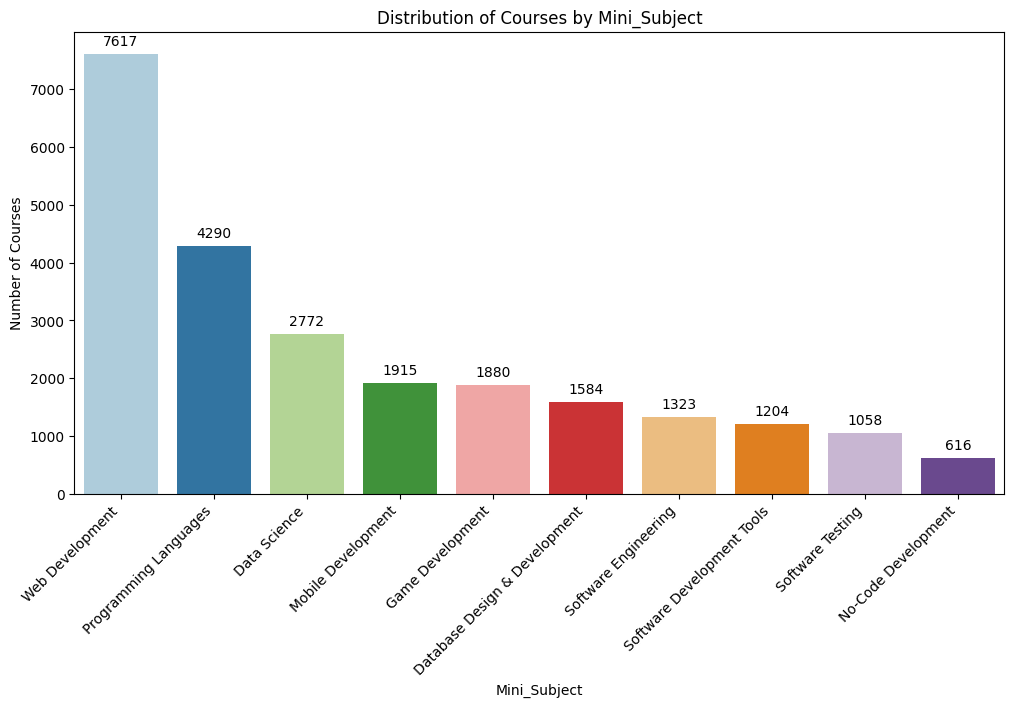

In [231]:

cate_count = CMS_df['Mini_Subject_ID'].value_counts().reset_index()
cate_count.columns = ['Mini_Subject_ID', 'cate_count']
cate_count = pd.merge(cate_count, Mini_Subject_df, on='Mini_Subject_ID', how='inner')


plt.figure(figsize=(12,6))
barplot =sns.barplot(x='Mini_Subject_Name', y = 'cate_count', data=cate_count, palette='Paired')
plt.title('Distribution of Courses by Mini_Subject')
plt.xlabel('Mini_Subject', fontsize =10)
plt.ylabel('Number of Courses')
plt.xticks(rotation=45, ha = 'right')

for p in barplot.patches:
    barplot.annotate(format(int(p.get_height()), 'd'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


### __2.2/ Percentage of Courses Quantites by Level__

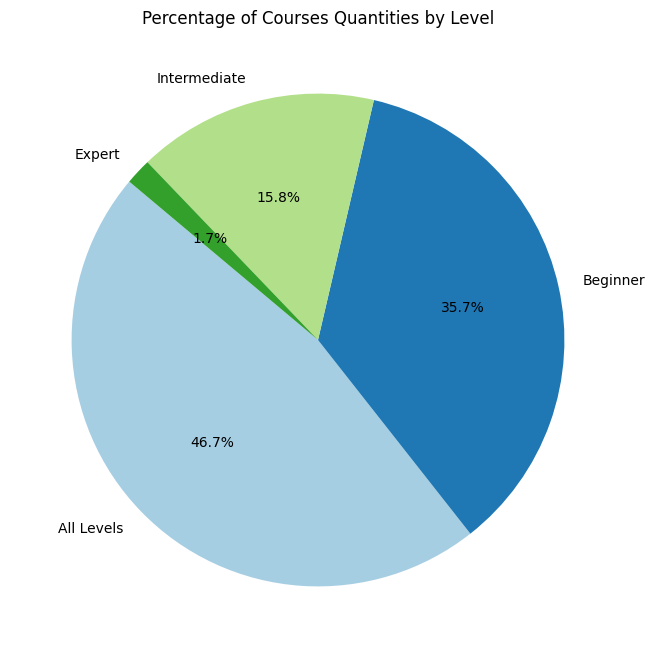

In [232]:
level_counts = Course_df['Level'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Percentage of Courses Quantities by Level')
plt.show()

#### __Observations:__

- Courses labeled as "All Levels" make up the largest proportion, accounting for 46.7% of all courses.
- The chart also indicates a decreasing trend in course count as difficulty increases:  
  Beginner: 35.7% → Intermediate: 15.8% → Expert: 1.7%.  
- Notably, there are very few courses at the Expert level.

> The majority of Udemy courses target either beginners or a general audience (All Levels), while advanced-level content—especially Expert-level—is relatively scarce on the platform.


#### __2.3/ Course Distribution by Language__

C:\Users\HP\AppData\Local\Temp\ipykernel_22276\310411315.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x= 'Language', y = 'rate', data = Lang_count, palette='Paired')


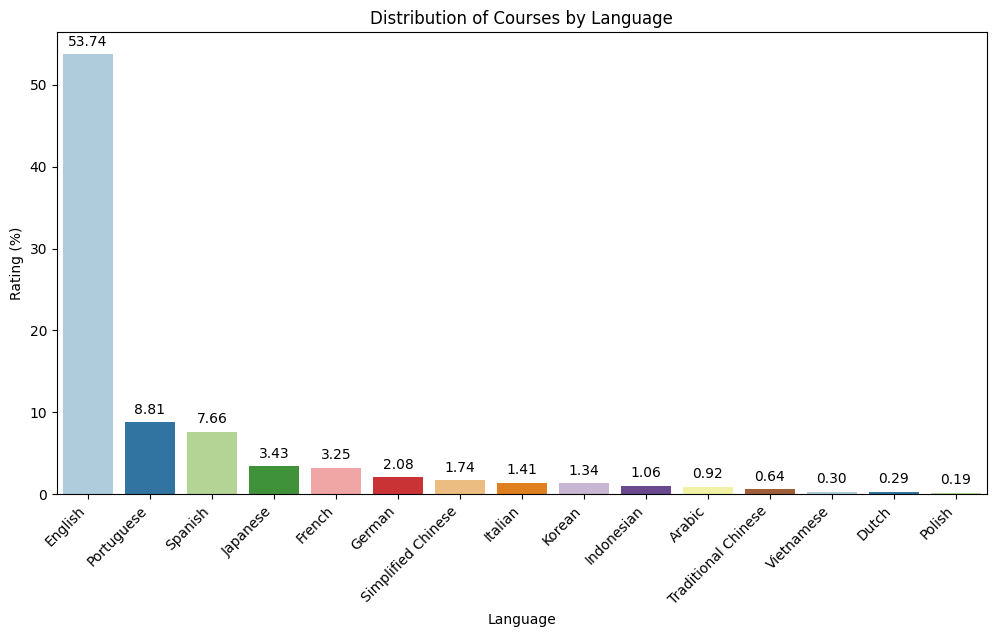

In [233]:
Lang_count = CS_df['Language_ID'].value_counts().reset_index().sort_index(ascending= True).head(15)
Lang_count.columns = ['Language_ID', 'lang_count']

total_course = Course_df['Course_ID'].nunique()

Lang_count['rate'] = round((Lang_count['lang_count'] / total_course)*100,2)

Lang_count = pd.merge(Lang_count, Language_df, on='Language_ID', how='inner')

plt.figure(figsize=(12,6))
barplot = sns.barplot(x= 'Language', y = 'rate', data = Lang_count, palette='Paired')
plt.title('Distribution of Courses by Language')
plt.xlabel('Language')
plt.ylabel('Rating (%)')
plt.xticks(rotation=45, ha = 'right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points',
                     )
plt.show()


#### __Observations:__

- Each course may support multiple languages to broaden accessibility for learners.  
- English is the most commonly supported language, appearing in 53.5% of all courses.  
- Other popular languages include Portuguese (8.8%) and Spanish (7.62%).  
- While many other languages are supported, they account for a relatively small share of the total.

> The dominance of English and other major global languages (like Portuguese and Spanish) reflects Udemy’s strategy to reach a wide international audience, aligned with the global prevalence of these languages.


### __3/ Correlation Analysis__

#### __3.1/ Course__

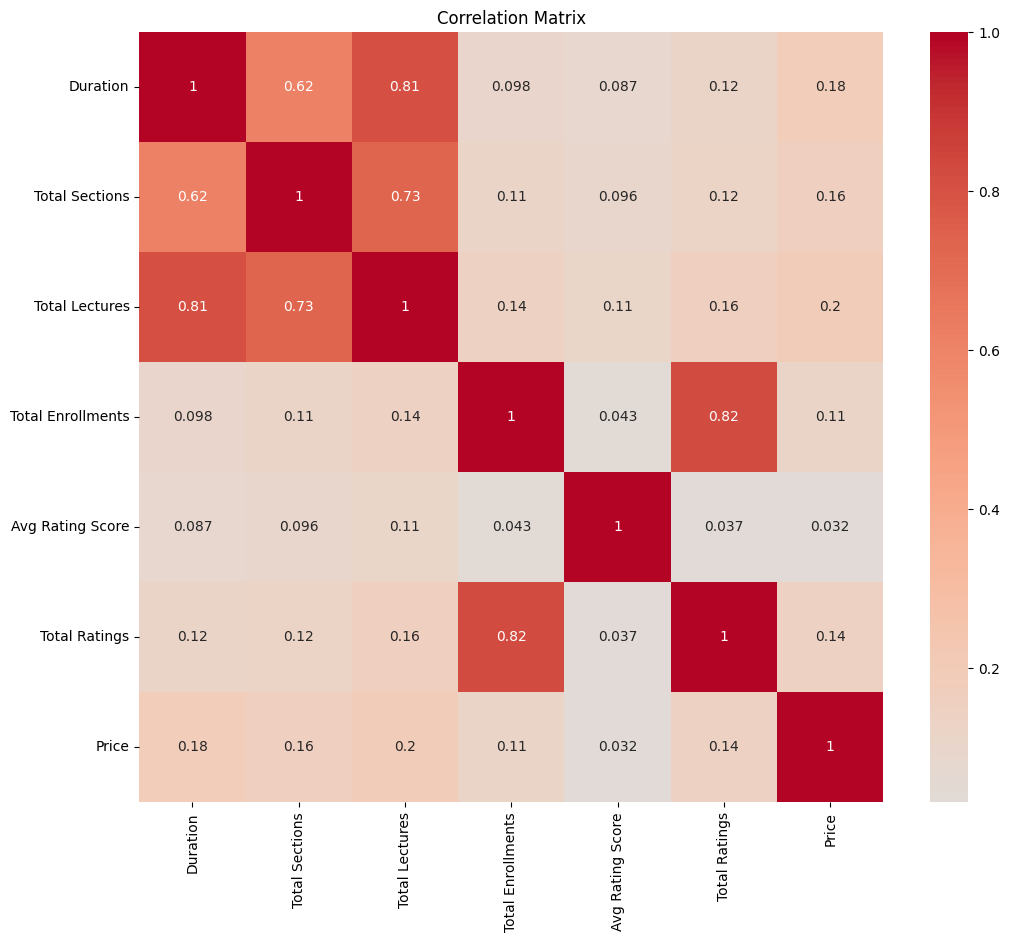

In [234]:
corr_matrix = Course_df[Course_col_to_describe].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### __Observations:__

- Course structure features such as **Duration**, **Total Sections**, and **Total Lectures** show strong positive correlations.  
  → This suggests that longer courses tend to be divided into more sections and contain more lectures.
> **Total Ratings** and **Total Enrollments** are also highly correlated, with a strong positive coefficient of **0.82**


#### __3.2/ Instructor__

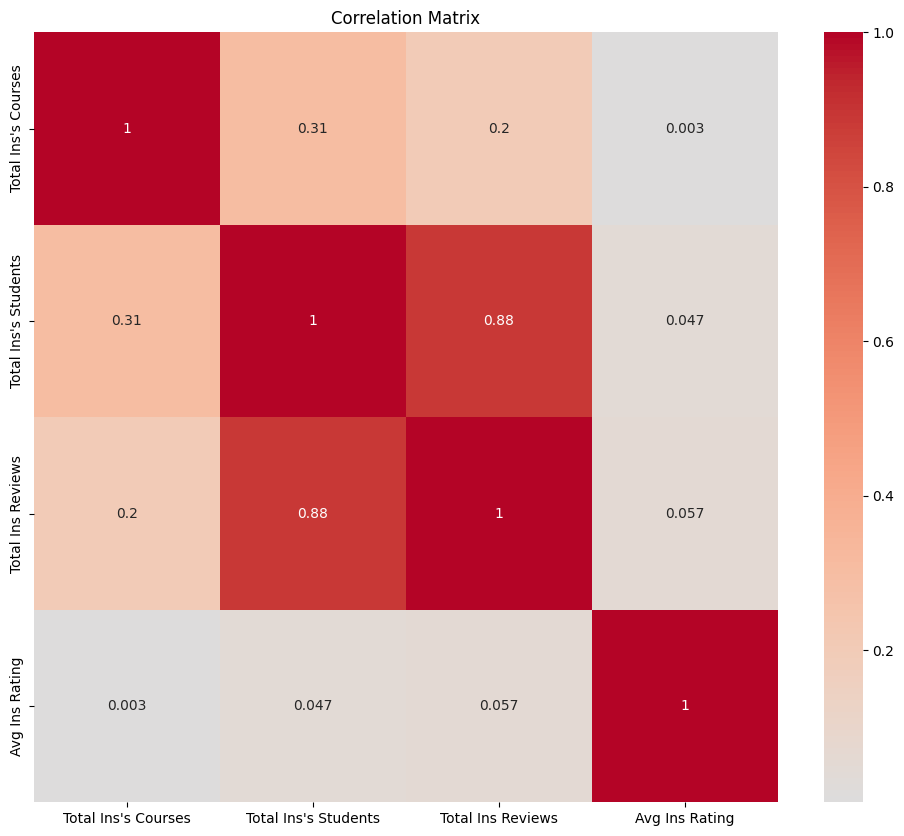

In [235]:
corr_matrix = Instructor_df[Ins_col_to_describe].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

#### __Observations:__

- There is a **very strong positive correlation (0.88)** between **Total Instructor's Students** and **Total Instructor's Reviews**, indicating that instructors with more students tend to receive more reviews.

- There is a **moderate positive correlation (0.31)** between **Total Instructor's Students** and **Total Instructor's Courses**, suggesting only a slight tendency for instructors with more students to have created more courses.



## __Conclusion in EDA:__

> The dataset contains numerous outliers and most features show little to no correlation with each other, indicating a high level of independence among variables. Some problems are stand out: 
    
> Depending on the specific analytical goals, these outliers should be carefully handled to avoid distortion while still preserving their potential significance

 


# __C. PREDICTION AND CLUSTERING MODEL__

## **I/  Enrollment Forecast Model**

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### **1/ Import Data**

In [237]:
df = pd.merge(Course_df, CS_df, on='Course_ID')
df = pd.merge(df, Language_df.drop(columns=['Language']), on='Language_ID')
df = pd.merge(df, CMS_df, on='Course_ID')
df = pd.merge(df, Mini_Subject_df, on='Mini_Subject_ID')
df = pd.merge(df, Instructor_df, on='Instructor Name')

### **2/ EDA & Feature Engineering**

#### __2.1/ Histogram plots of numerical columns__

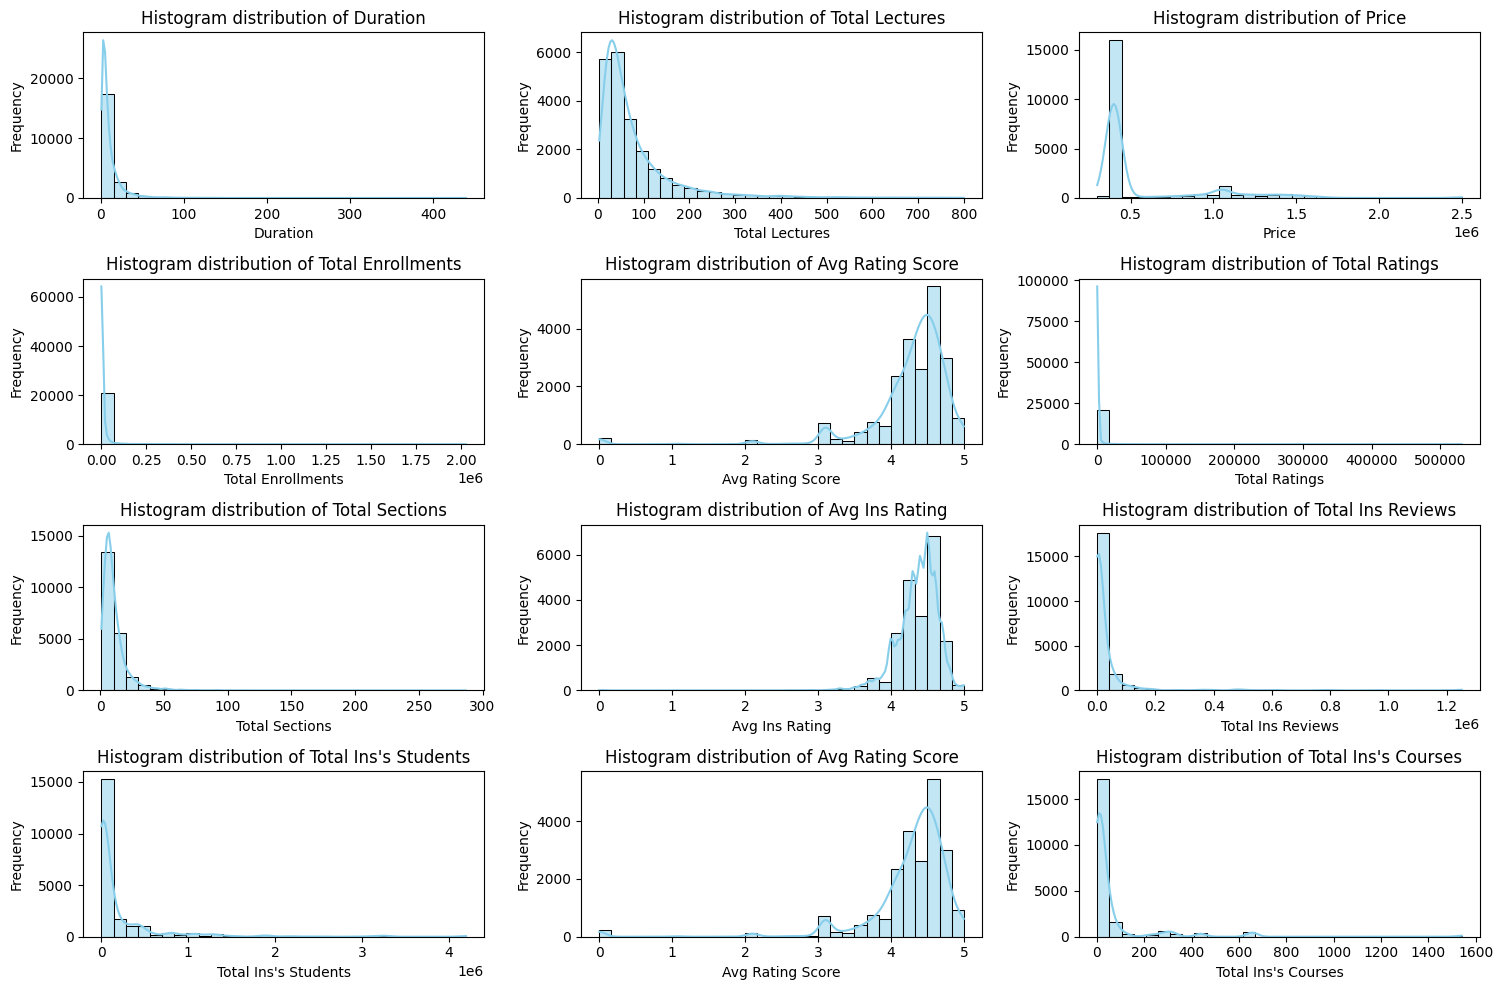

Skewness of each column:
Col 1 - Duration: 5.26
Col 2 - Total Lectures: 3.15
Col 3 - Price: 2.09
Col 4 - Total Enrollments: 21.37
Col 5 - Avg Rating Score: -3.76
Col 6 - Total Ratings: 30.68
Col 7 - Total Sections: 4.27
Col 8 - Avg Ins Rating: -2.65
Col 9 - Total Ins Reviews: 6.55
Col 10 - Total Ins's Students: 4.42
Col 11 - Avg Rating Score: -3.76
Col 12 - Total Ins's Courses: 5.16


Columns are skewed:
Col 1 - Duration
Col 2 - Total Lectures
Col 3 - Price
Col 4 - Total Enrollments
Col 5 - Avg Rating Score
Col 6 - Total Ratings
Col 7 - Total Sections
Col 8 - Avg Ins Rating
Col 9 - Total Ins Reviews
Col 10 - Total Ins's Students
Col 11 - Avg Rating Score
Col 12 - Total Ins's Courses


In [238]:
numeric_columns = ['Duration', 'Total Lectures', 'Price', 'Total Enrollments',
                   'Avg Rating Score', 'Total Ratings', 'Total Sections',
                   'Avg Ins Rating', 'Total Ins Reviews', "Total Ins's Students", 'Avg Rating Score',
                   "Total Ins's Courses"]
                   
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Histogram distribution of {column}")
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms_numeric_columns.png')
plt.show()

# Calculate and print the skewness of numeric columns:
L = []
i = 0
print("Skewness of each column:", end='\n')
for column in numeric_columns:
    skewness = df[column].skew()
    i += 1
    print(f"Col {i} - {column}: {skewness:.2f}")
    if abs(skewness) > 1.5:
        L.append(column)
    
print('\n')
print(f"Columns are skewed:")
i = 0
for x in L: 
    i += 1
    print(f'Col {i} - {x}')


#### __Observations:__

- After performing EDA, we observe that **all numerical columns are highly skewed**, with **Total Enrollments** showing the most extreme skewness (21.37), indicating severe right-skewness in the data (excludes columns about "Rating Score")

- To mitigate the impact of outliers, techniques such as **Log Transformation** and **Three Sigma Limits** should be applied.


#### __2.2/ Outlier Handling by Log Transformation__

In [239]:
# Copy into a new df
df_transformed = df.copy()

col_to_log_transform = ['Duration', 'Total Lectures', 'Price', 'Total Enrollments',
                        'Total Sections','Total Ins Reviews', "Total Ins's Students",
                        "Total Ins's Courses"]

# Log transform with np.log1p
for column in col_to_log_transform:
    df_transformed[column] = np.log1p(df_transformed[column])

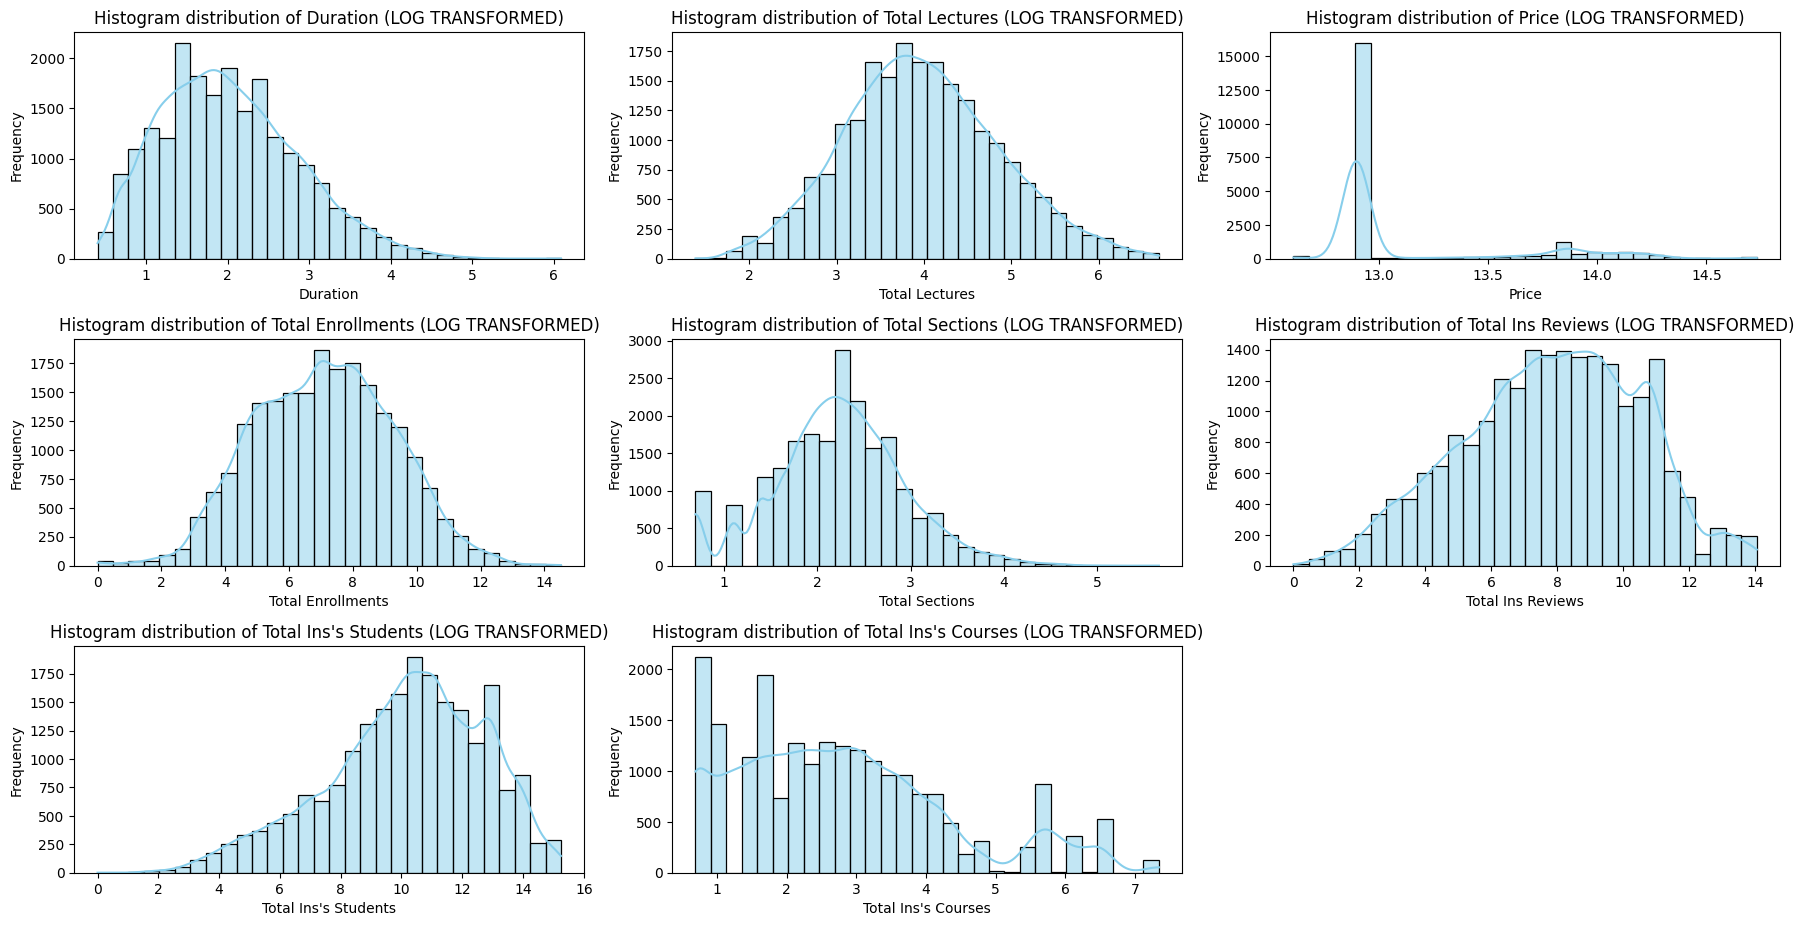

Skewness of each column:
Col 1 - Duration: 0.50
Col 2 - Total Lectures: 0.22
Col 3 - Price: 1.51
Col 4 - Total Enrollments: -0.02
Col 5 - Total Sections: 0.05
Col 6 - Total Ins Reviews: -0.20
Col 7 - Total Ins's Students: -0.49
Col 8 - Total Ins's Courses: 0.72


Columns are needed to be HANDLED:
Col 1 - Price


In [240]:
plt.figure(figsize=(18, 12))
for i, column in enumerate(col_to_log_transform, 1):
    plt.subplot(4, 3, i)
    plt.title(f"Histogram distribution of {column} (LOG TRANSFORMED)")
    sns.histplot(df_transformed[column], bins=30, kde=True, color='skyblue')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Calculate and print the skewness of numeric columns:
K = []
i = 0
print("Skewness of each column:", end='\n')
for column in col_to_log_transform:
    skewness = df_transformed[column].skew()
    i += 1
    print(f"Col {i} - {column}: {skewness:.2f}")
    if abs(skewness) > 1.5:
        K.append(column)
    
print('\n')
print(f"Columns are needed to be HANDLED:")
i = 0
for x in K: 
    i += 1
    print(f'Col {i} - {x}')


#### __Observations:__

> Although the "**Price**" column remains skewed even after applying a log transformation, its impact is relatively minimal. Therefore, we can still include this feature in the Feature Selection step.

#### __2.3/ PCA (Duration, Total Lectures, Total Sections); ("Total Ins Reviews", "Total Ins's Students")__ 


In [241]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca_model = PCA(n_components=0.95)

##### __PCA for Course's Structure Columns__

In [242]:
structure_col = ['Duration', 'Total Lectures', 'Total Sections']

# Standard Scaler
df_pca = scaler.fit_transform(df_transformed[structure_col] )

# PCA modeling
df_pca = pca_model.fit_transform(df_pca)
print(f'Explained variance ratio of {pca_model.n_components_} component(s) is {pca_model.explained_variance_ratio_}')

df_structure_pca = pd.DataFrame(df_pca, columns=['structure_PCA1', 'structure_PCA2'])

Explained variance ratio of 2 component(s) is [0.82215045 0.13074799]


In [243]:
df_structure_pca

,structure_PCA1,structure_PCA2
0,-2.730097,0.295937
1,-0.915235,-0.474107
2,-0.784970,0.638976
3,-2.628639,0.586979
4,-2.453771,0.183182
...,...,...
21242,-0.674072,0.062345
21243,1.012665,-0.465877
21244,-3.083446,0.534896
21245,-1.089766,0.807339


##### __PCA for Instructor Columns__

In [244]:
ins_col = ["Total Ins Reviews", "Total Ins's Students"]

# Standard Scaler 
df_pca2 = scaler.fit_transform(df_transformed[ins_col])

# PCA modeling
df_pca2 = pca_model.fit_transform(df_pca2)
print(f'Explained variance ratio of {pca_model.n_components_} component(s) is {pca_model.explained_variance_ratio_}')

df_ins_pca = pd.DataFrame(df_pca2, columns=['ins_PCA'])

Explained variance ratio of 1 component(s) is [0.96163534]


In [245]:
df_ins_pca

,ins_PCA
0,0.587526
1,-2.187335
2,0.962090
3,0.587526
4,1.464385
...,...
21242,-2.512364
21243,-0.022122
21244,0.587526
21245,0.326574


#### __2.4/ Encoding features__

In [246]:
from sklearn.preprocessing import OneHotEncoder

In [247]:
# Frequency Encoding for Language columns 
def freq_encode(series): 
    freq = series.value_counts(normalize = True)
    return series.map(freq)

df_transformed['Language_Encoded'] = freq_encode(df_transformed['Language'])

In [248]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21247 entries, 0 to 21246
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Course Name           21247 non-null  object 
 1   Language              21247 non-null  object 
 2   Level                 21247 non-null  object 
 3   Duration              21247 non-null  float64
 4   Total Sections        21247 non-null  float64
 5   Total Lectures        21247 non-null  float64
 6   Total Enrollments     21247 non-null  float64
 7   Avg Rating Score      21247 non-null  float64
 8   Total Ratings         21247 non-null  int64  
 9   Last Updated          21247 non-null  object 
 10  Price                 21247 non-null  float64
 11  URL                   21247 non-null  object 
 12  Instructor Name       21247 non-null  object 
 13  Course_ID             21247 non-null  int64  
 14  Language_ID           21247 non-null  int64  
 15  Mini_Subject_ID    

In [249]:
# OneHotEnocder for Level col 
ohe_level = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
level_encoded = ohe_level.fit_transform(df[['Level']])
level_columns = ohe_level.get_feature_names_out(['Level'])
level_df = pd.DataFrame(level_encoded, columns=level_columns, index=df.index)

level_df

,Level_All Levels,Level_Beginner,Level_Expert,Level_Intermediate
0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
21242,0.0,0.0,1.0,0.0
21243,0.0,1.0,0.0,0.0
21244,0.0,0.0,0.0,1.0
21245,0.0,1.0,0.0,0.0


In [250]:
# OneHotEncoder for Mini_Subject_Name col 
ohe_minisubject = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
subject_encoded = ohe_minisubject.fit_transform(df[['Mini_Subject_Name']])
subject_columns = ohe_minisubject.get_feature_names_out(['Mini_Subject_Name'])
subject_df = pd.DataFrame(subject_encoded, columns = subject_columns, index=df.index)

subject_df

,Mini_Subject_Name_Data Science,Mini_Subject_Name_Database Design & Development,Mini_Subject_Name_Game Development,Mini_Subject_Name_Mobile Development,Mini_Subject_Name_No-Code Development,Mini_Subject_Name_Programming Languages,Mini_Subject_Name_Software Development Tools,Mini_Subject_Name_Software Engineering,Mini_Subject_Name_Software Testing,Mini_Subject_Name_Web Development
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21242,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21243,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21244,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### __3/ Feature Selection__

In [251]:
df_transformed = pd.concat([df_transformed, df_structure_pca, df_ins_pca, level_df, subject_df], axis=1)
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21247 entries, 0 to 21246
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Course Name                                      21247 non-null  object 
 1   Language                                         21247 non-null  object 
 2   Level                                            21247 non-null  object 
 3   Duration                                         21247 non-null  float64
 4   Total Sections                                   21247 non-null  float64
 5   Total Lectures                                   21247 non-null  float64
 6   Total Enrollments                                21247 non-null  float64
 7   Avg Rating Score                                 21247 non-null  float64
 8   Total Ratings                                    21247 non-null  int64  
 9   Last Updated                

In [252]:
# Drop columns 
df_transformed = df_transformed.drop(columns = ['Course Name', 'Language', 'Level',
                                                'Duration', 'Total Sections', 'Total Lectures',
                                                'Last Updated', 'URL', 'Instructor Name',
                                                'Course_ID', 'Language_ID', 'Mini_Subject_ID',
                                                'Instructor_ID' ,'Mini_Subject_Name', 
                                                "Total Ins Reviews", "Total Ins's Students"])
df_transformed

,Total Enrollments,Avg Rating Score,Total Ratings,Price,Total Ins's Courses,Avg Ins Rating,Language_Encoded,structure_PCA1,structure_PCA2,ins_PCA,...,Mini_Subject_Name_Data Science,Mini_Subject_Name_Database Design & Development,Mini_Subject_Name_Game Development,Mini_Subject_Name_Mobile Development,Mini_Subject_Name_No-Code Development,Mini_Subject_Name_Programming Languages,Mini_Subject_Name_Software Development Tools,Mini_Subject_Name_Software Engineering,Mini_Subject_Name_Software Testing,Mini_Subject_Name_Web Development
0,3.091042,5.0,3,12.896719,7.340836,4.5,0.018873,-2.730097,0.295937,0.587526,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.043051,4.7,13,14.731402,2.708050,4.7,0.007154,-0.915235,-0.474107,-2.187335,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,9.795735,4.0,167,12.896719,3.713572,4.3,0.682120,-0.784970,0.638976,0.962090,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,5.093750,4.6,29,12.896719,7.340836,4.5,0.018873,-2.628639,0.586979,0.587526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.684401,4.4,57,12.896719,5.488938,4.3,0.682120,-2.453771,0.183182,1.464385,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21242,4.709530,4.0,31,12.896719,1.098612,4.1,0.082976,-0.674072,0.062345,-2.512364,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21243,5.303305,4.8,12,12.896719,2.484907,4.7,0.682120,1.012665,-0.465877,-0.022122,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21244,3.433987,4.9,3,12.896719,7.340836,4.5,0.018873,-3.083446,0.534896,0.587526,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21245,8.432942,3.7,163,12.896719,3.295837,3.9,0.682120,-1.089766,0.807339,0.326574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [253]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21247 entries, 0 to 21246
Data columns (total 24 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Total Enrollments                                21247 non-null  float64
 1   Avg Rating Score                                 21247 non-null  float64
 2   Total Ratings                                    21247 non-null  int64  
 3   Price                                            21247 non-null  float64
 4   Total Ins's Courses                              21247 non-null  float64
 5   Avg Ins Rating                                   21247 non-null  float64
 6   Language_Encoded                                 21247 non-null  float64
 7   structure_PCA1                                   21247 non-null  float64
 8   structure_PCA2                                   21247 non-null  float64
 9   ins_PCA                     

### **4/ Prediction Model Processing**

In [254]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import lightgbm as lgb 
import xgboost as xgb 

#### __4.1/ Data preparation__

In [255]:
# 1. Data preparation 
X = df_transformed.drop(columns=['Total Enrollments'])
X.columns = [col.replace(' ', '_') for col in X.columns]
y = df_transformed['Total Enrollments']

# 2. Cross-validation 
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = 'neg_root_mean_squared_error'

#### __4.2/ Model processing & evaluation__

In [256]:
def evaluate_all_metrics(model, X, y, cv):
    rmse_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_root_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    return {
        'RMSE': (rmse_scores.mean(), rmse_scores.std()),
        'MAE': (mae_scores.mean(), mae_scores.std()),
        'R2': (r2_scores.mean(), r2_scores.std())
    }

results = {}

# Linear Regression 
lr = LinearRegression()
results['Linear Regression'] = evaluate_all_metrics(lr, X, y, cv)

# LightGBM 
lgbm = lgb.LGBMRegressor(random_state=42)
results['LightGBM'] = evaluate_all_metrics(lgbm, X, y, cv)

# XGBoost
xgbr = xgb.XGBRegressor(random_state=42, verbosity=0)
results['XGBoost'] = evaluate_all_metrics(xgbr, X, y, cv)

# Print results
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"RMSE: {metrics['RMSE'][0]:.4f} ± {metrics['RMSE'][1]:.4f}")
    print(f"MAE: {metrics['MAE'][0]:.4f} ± {metrics['MAE'][1]:.4f}")
    print(f"R2: {metrics['R2'][0]:.4f} ± {metrics['R2'][1]:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 16997, number of used features: 23
[LightGBM] [Info] Start training from score 7.089261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1367
[LightGBM] [Info] Number of data points in the train set: 16997, number of used features: 23
[LightGBM] [Info] Start training from score 7.100588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

#### __Observations:__

* All boosting models (LightGBM, XGBoost) achieve a very high R² (~0.85), indicating strong ability to capture complex relationships in the data and explain most of the variance in course enrollments.
* However, the RMSE and MAE values on the log scale remain relatively high (e.g., XGBoost: RMSE ~0.84, MAE ~0.60). This means that, when converted back to the original scale, the absolute prediction error can still be significant—especially for courses with a large number of enrollments.
* The models are robust to outliers and provide stable results across folds, but the log-scale error highlights that the predictions are not yet sufficiently accurate for practical applications where precise enrollment numbers are required.

#### __4.3/ Features Important__


Best model: XGBoost

Top 10 Feature Importances:
Total_Ratings                            0.508391
Language_Encoded                         0.120314
ins_PCA                                  0.049623
Mini_Subject_Name_Software_Testing       0.043294
Total_Ins's_Courses                      0.038143
Avg_Ins_Rating                           0.036799
Mini_Subject_Name_No-Code_Development    0.023065
Level_Beginner                           0.016356
Level_All_Levels                         0.016146
Mini_Subject_Name_Mobile_Development     0.013296
dtype: float32


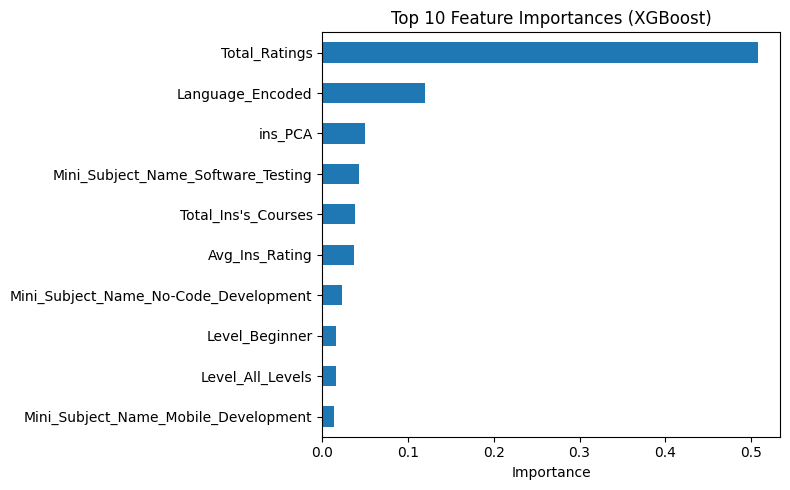

In [257]:
# Find the best model based on the lowest RMSE
best_model_name = min(results, key=lambda k: results[k]['RMSE'][0])
print(f"\nBest model: {best_model_name}")

# Retrain the best model on the entire dataset
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
    best_model.fit(X, y)
    feature_importance = pd.Series(np.abs(best_model.coef_), index=X.columns)
elif best_model_name == 'LightGBM':
    best_model = lgb.LGBMRegressor(random_state=42)
    best_model.fit(X, y)
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
else:
    best_model = xgb.XGBRegressor(random_state=42, verbosity=0)
    best_model.fit(X, y)
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)

# Print top 10 most important features
top_features = feature_importance.sort_values(ascending=False).head(10)
print('\nTop 10 Feature Importances:')
print(top_features)

# Plot feature importance
plt.figure(figsize=(8, 5))
top_features.sort_values().plot(kind='barh')
plt.title(f'Top 10 Feature Importances ({best_model_name})')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

#### __Conclusion:__

> The main advantage of these models is their high R², demonstrating good explanatory power and stability.

> However, the prediction error is still considerable, making the models unsuitable for direct real-world deployment if high accuracy is needed (e.g., for revenue forecasting or marketing planning).

> Further improvements are necessary: consider experimenting with other algorithms, advanced feature engineering, or better outlier handling to reduce absolute error and enhance practical applicability.

## **II. Clustering Analysis for Udemy Courses**

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

### __1/ Data Preparation__

In [259]:
# Load course data
df = pd.read_csv('Course.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24247 entries, 0 to 24246
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Course Name        24247 non-null  object 
 1   Language           24247 non-null  object 
 2   Level              24247 non-null  object 
 3   Duration           24247 non-null  float64
 4   Total Sections     24247 non-null  int64  
 5   Total Lectures     24247 non-null  int64  
 6   Total Enrollments  24247 non-null  int64  
 7   Avg Rating Score   24247 non-null  float64
 8   Total Ratings      24247 non-null  int64  
 9   Last Updated       24247 non-null  object 
 10  Price              24247 non-null  int64  
 11  URL                24247 non-null  object 
 12  Instructor Name    24247 non-null  object 
 13  Course_ID          24247 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 2.6+ MB


> `Total Enrollments` have many outliers so I cut this data (at 68% threshold) to decrease impacts of outliers 

In [260]:
# Standardize 'Total Enrollments'
features = ['Total Enrollments']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df.index)

# Split data at 68% threshold (within 1 std from mean)
target_column = 'Total Enrollments'
mean = df_scaled[target_column].mean()
std = df_scaled[target_column].std()
lower_bound = mean - std
upper_bound = mean + std

df_within_68 = df_scaled[(df_scaled[target_column] >= lower_bound) & (df_scaled[target_column] <= upper_bound)]
df_Common = df.loc[df_within_68.index]


print("df_Common:", df_Common.shape)

df_Common: (23526, 14)


### __2/ Clustering processing__

#### **2.1/ Features Selection**


In [261]:
# Select features for clustering
features = ['Total Enrollments', 'Avg Rating Score']
df_features = df_Common[features].copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

#### **2.2/ Determining Optimal Number of Clusters**


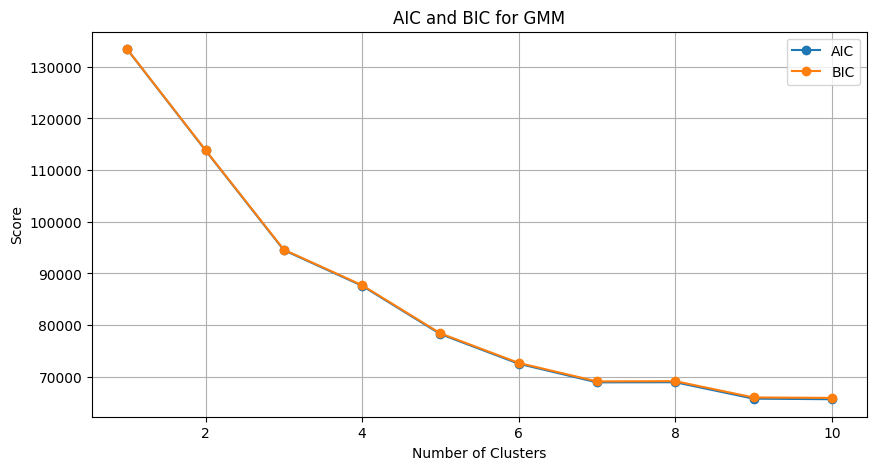

In [262]:
aic_scores = []
bic_scores = []
n_components_range = range(1, 11)

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42, covariance_type='tied', reg_covar=1e-3)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))

plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('AIC and BIC for GMM')
plt.legend()
plt.grid(True)
plt.show()

> K = 3 is the optimal number of clusters

#### **2.3/ GMM clustering**


In [263]:
# Fit GMM with optimal K (e.g., K=3)
K = 3
gmm = GaussianMixture(n_components=K, covariance_type='tied', random_state=42, reg_covar=1e-3)
gmm.fit(X_scaled)

# Assign cluster labels
df_Common['Cluster'] = gmm.predict(X_scaled)

# Silhouette Score
score = silhouette_score(X_scaled, df_Common['Cluster'])
print(f"Silhouette Score for GMM Clustering with K={K}: {score:.2f}")

Silhouette Score for GMM Clustering with K=3: 0.72


#### **2.4/ EDA clusters**


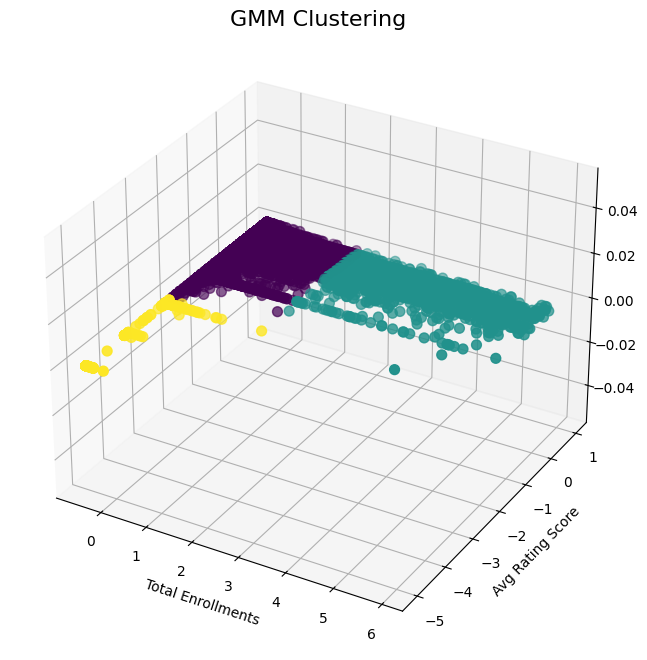

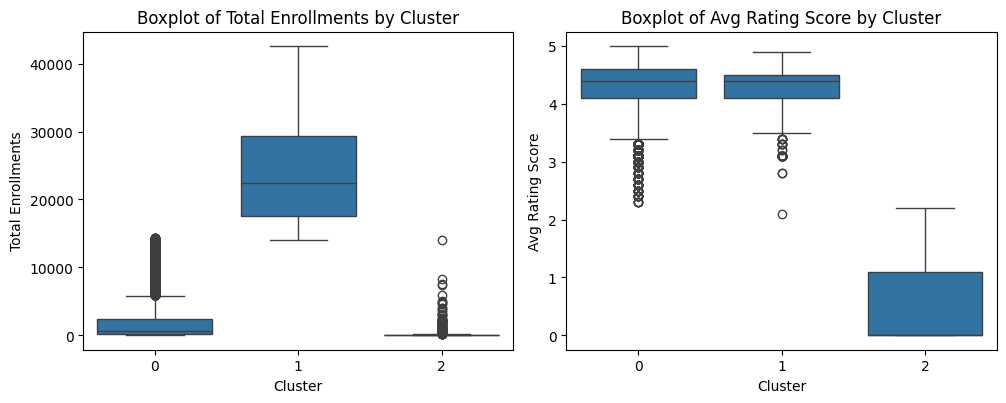

Cluster                             0             1             2
Total Enrollments count  21087.000000   1647.000000    792.000000
                  mean    1962.559634  23946.525804    248.772727
                  std     2910.318950   7511.882670    923.178218
                  min        1.000000  14061.000000      0.000000
                  25%      152.000000  17608.500000      2.000000
                  50%      649.000000  22347.000000      8.000000
                  75%     2432.000000  29301.000000     83.500000
                  max    14347.000000  42595.000000  14050.000000
Avg Rating Score  count  21087.000000   1647.000000    792.000000
                  mean       4.308413      4.302489      0.550379
                  std        0.456551      0.346094      0.886362
                  min        2.300000      2.100000      0.000000
                  25%        4.100000      4.100000      0.000000
                  50%        4.400000      4.400000      0.000000
          

In [264]:
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_Common['Cluster'], cmap='viridis', s=50)
ax.set_title('GMM Clustering', fontsize=16)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
plt.show()

# Boxplots by Cluster
plt.figure(figsize=(15, 15))
for i, column in enumerate(features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='Cluster', y=column, data=df_Common)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

# Descriptive statistics by cluster
summary = df_Common.groupby('Cluster')[features].describe().T
print(summary)

#### __Clusters name:__
> `Cluster 0 – "Popular & High Quality"`

* The majority group with 21,087 courses
* Number of students: 152 – 2,432 students
* Average rating: 4.1 – 4.6

> `Cluster 1 – "Hot & Trending"`

* Medium-sized group with 1,647 courses
* Number of students: 17,000 – 30,000 students
* Average rating: 4.1 – 4.5

> `Cluster 2 – "Niche & Less Popular"`

* Smallest group with 792 courses
* Number of students: 2 – 83 students
* Average rating: 0 – 1.1

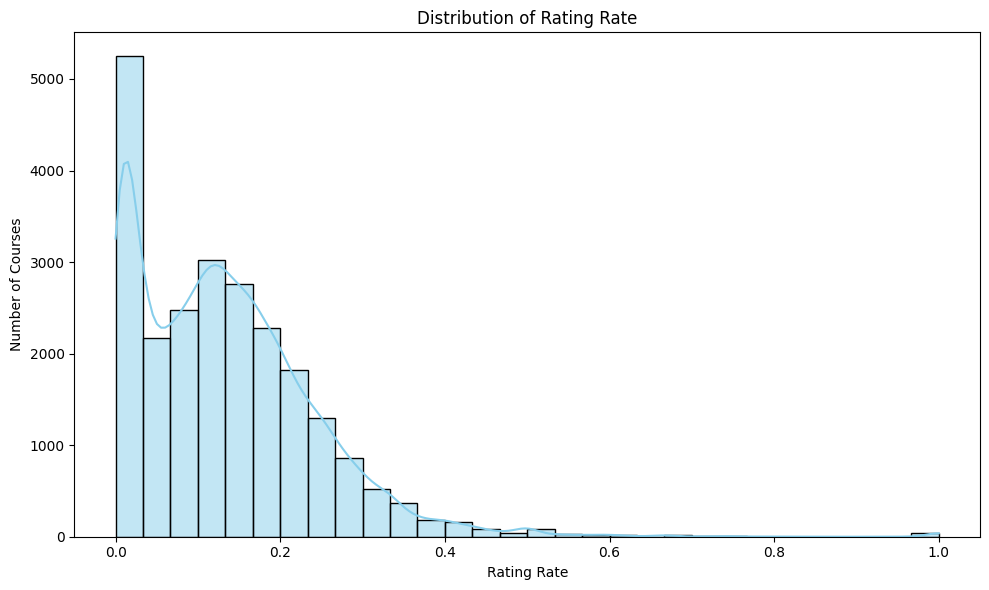

In [265]:
# Calculate Rating Rate
df_Common["Rating Rate"] = df_Common.apply(
    lambda row: row["Total Ratings"] / row["Total Enrollments"] if row["Total Enrollments"] != 0 else 0,
    axis=1
)

# Histogram of Rating Rate
plt.figure(figsize=(10, 6))
sns.histplot(df_Common['Rating Rate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Rating Rate')
plt.xlabel('Rating Rate')
plt.ylabel('Number of Courses')
plt.tight_layout()
plt.show()

# Categorize Duration, Price, and Interaction
df_Common['Durations'] = pd.cut(df_Common['Duration'], bins=[0, 3, 8, 15, df_Common['Duration'].max()],
                                labels=['Very Short (<3)', 'Short (3-8)', 'Medium (8-15)', 'Long (>15)'])
df_Common['Price_Level'] = pd.cut(df_Common['Price'], bins=[0, 400000, 900000, 1500000, df_Common['Price'].max()],
                                  labels=['Low (<400K)', 'Medium (400-900K)', 'High (900K-1.5M)', 'Very High (>1.5M)'])
df_Common['Interact'] = pd.cut(df_Common['Rating Rate'], bins=[0, 0.1, 0.4, df_Common['Rating Rate'].max()],
                               labels=['Low (<0.1)', 'Medium (0.1-0.4)', 'High (>0.4)'])

##### ***Stacked Bar Charts for Categorical Features***

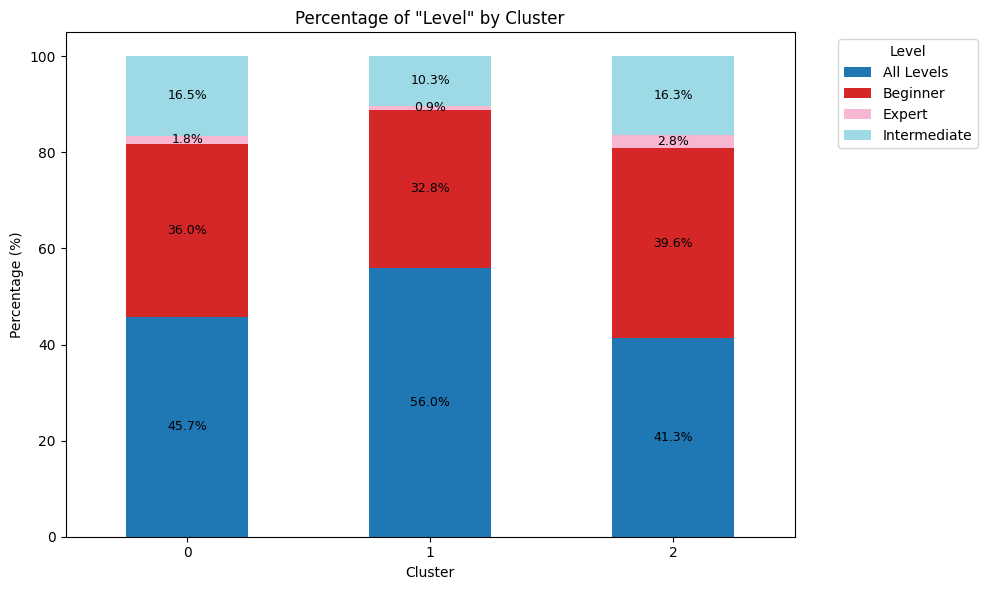

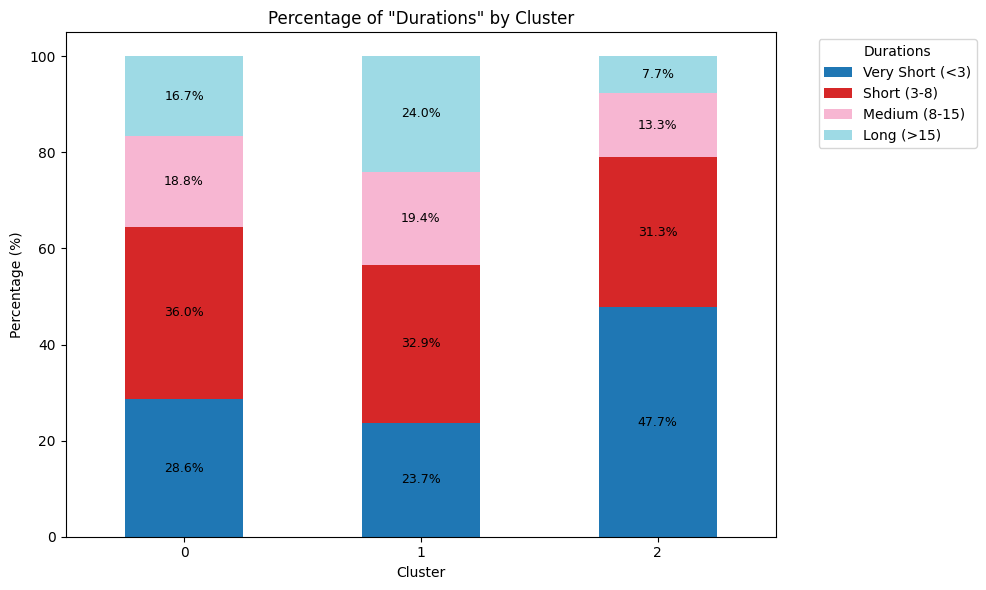

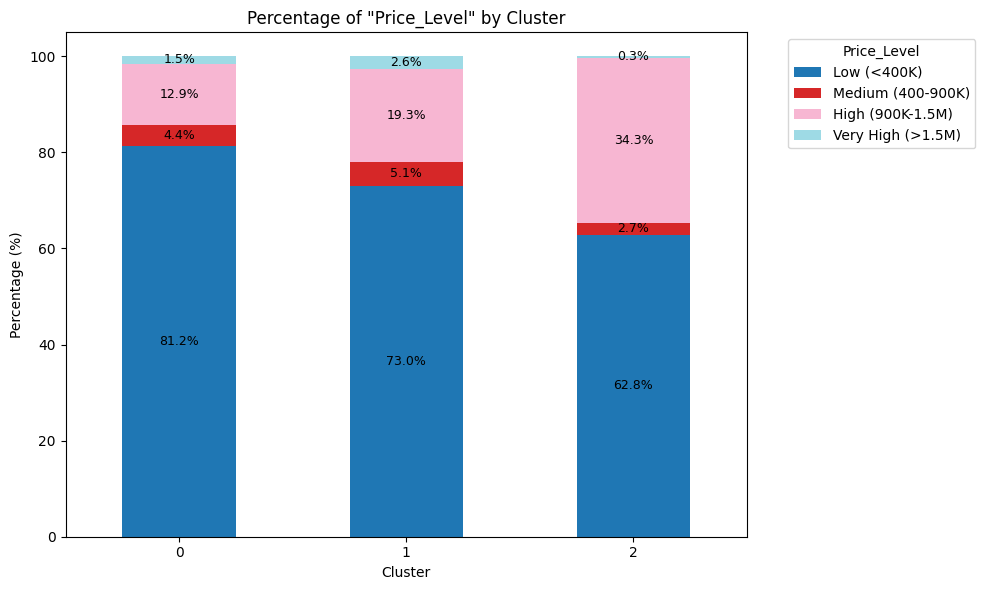

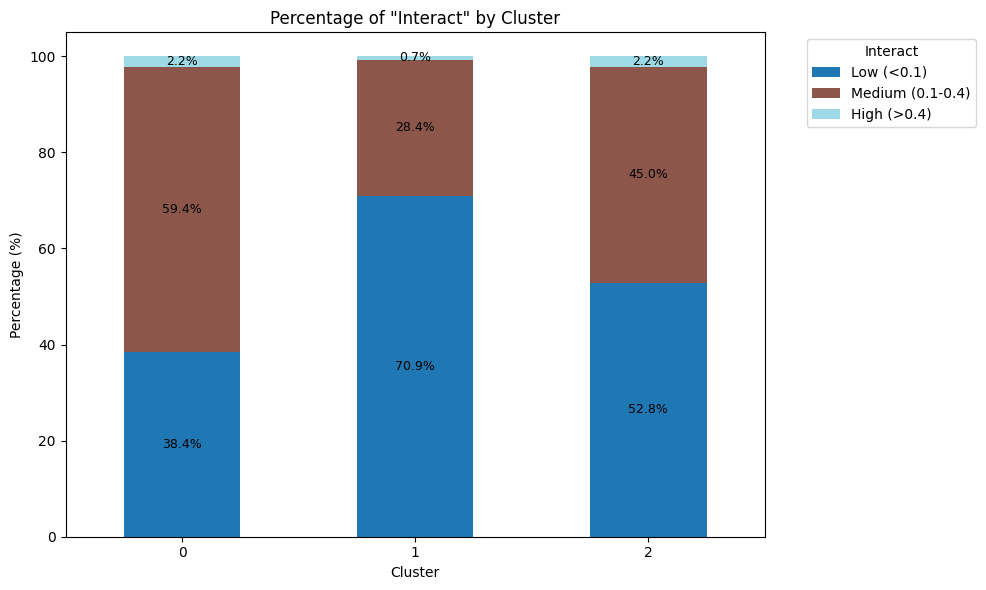

In [266]:
cat_features = ['Level', 'Durations', 'Price_Level', 'Interact']

for cat_col in cat_features:
    count_df = (
        df_Common
        .groupby(['Cluster', cat_col], observed=True)
        .size()
        .reset_index(name='Count')
    )
    total_df = count_df.groupby('Cluster')['Count'].sum().reset_index(name='Total')
    merged = count_df.merge(total_df, on='Cluster')
    merged['Percent'] = merged['Count'] / merged['Total'] * 100
    percent_df = merged.pivot(index='Cluster', columns=cat_col, values='Percent').fillna(0).astype('float')
    ax = percent_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(10, 6))
    for container in ax.containers:
        labels = [f'{bar.get_height():.1f}%' if bar.get_height() > 0 else '' for bar in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
    plt.title(f'Percentage of "{cat_col}" by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=0)
    plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

##### ***Top Languages per Cluster***

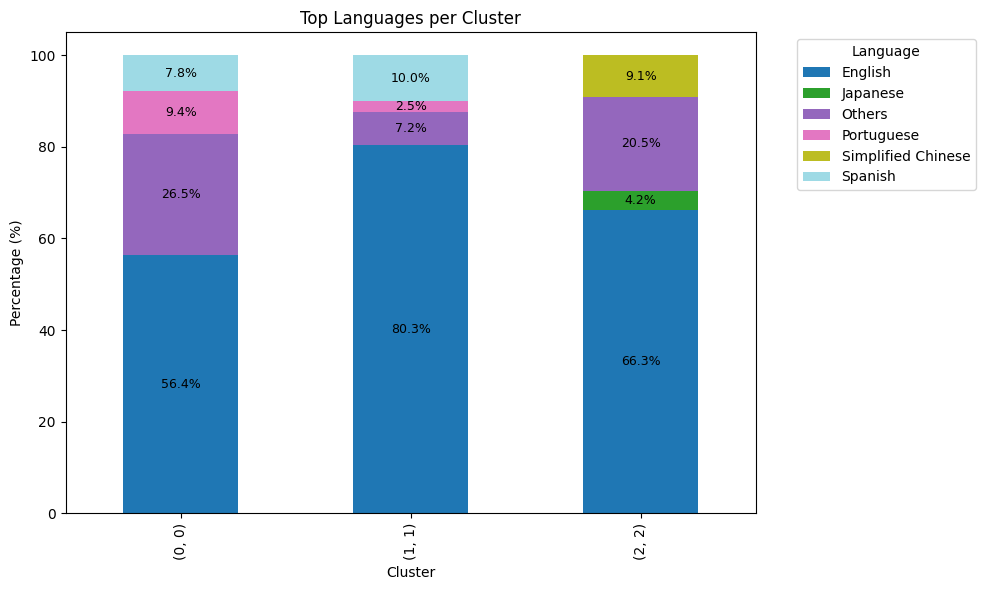

In [267]:
top_langs_per_cluster = (
    df_Common.groupby(['Cluster', 'Language'])
    .size()
    .groupby(level=0, group_keys=False)
    .nlargest(3)
    .reset_index()
)
top_langs_set = set(zip(top_langs_per_cluster['Cluster'], top_langs_per_cluster['Language']))

def map_language(row):
    if (row['Cluster'], row['Language']) in top_langs_set:
        return row['Language']
    else:
        return 'Others'

df_Common['Lang_Grouped'] = df_Common.apply(map_language, axis=1)
percent_df = (
    df_Common.groupby(['Cluster', 'Lang_Grouped'], observed=True)
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)
)
ax = percent_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
for container in ax.containers:
    labels = [f'{h.get_height():.1f}%' if h.get_height() > 0 else '' for h in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)
plt.title('Top Languages per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### **Conclusion**

> `Cluster 0 – "Popular & High Quality"`

- Popular, with quality content and a good level of engagement.
- Affordable, diverse in duration, mainly taught in English.
- Suitable for **beginners, easy to approach**.

> `Cluster 1 – "Hot & Trending"`


- Very popular, high enrollment, low price, but **lower engagement rate**.
- Affordable, diverse in duration, mostly taught in English.
- Suitable for **beginners with basic skills**.

> `Cluster 2 – "Niche & Less Popular"`

- Includes courses with **low efficiency, low student numbers, and poor ratings**.
- Short duration, some courses priced **higher**.
- Expanding to Chinese and Japanese but with **limited attraction**.
